# Economic Connectedness
---

The analysis of Economic Connectedness is the first assignment of the course Analytics Practicum I (Python).
The course is part of the curriculum of the MSc in Business Analytics program of the Department of Management Science and Technology of the Athens University of Economics and Business.

The current assignment has been inspired by two studies, that they have appeared in the journal Nature, carried out on social capital. The two studies are presented below:

* [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital I: measurement and associations with economic mobility. Nature 608, 108–121 (2022)](https://doi.org/10.1038/s41586-022-04996-4).

* [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital II: determinants of economic connectedness. Nature 608, 122–134 (2022)](https://doi.org/10.1038/s41586-022-04997-3).

The data needed, in order to make this analysis, are obtained from the two following sources:
* [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas).

* [Opportunity Insights](https://opportunityinsights.org/data/).

While the current analysis will be done on [Jupyter Notebook](http://jupyter.org/) and in [Python 3.10.0](https://www.python.org/downloads/release/python-3100/).

---

> Dimitrios Matsanganis <br />
> Academic ID: f2822212 <br />
> MSc Business Analytics 2022-2023 FT <br />
> Athens University of Economics and Business <br />
> dmatsanganis@gmail.com, dim.matsanganis@aueb.gr

---

---
## Preparatory Steps: Importation of the necessary Python libraries
---

The initial preparatory step of this assignment is the importation of the Python libraries that will be used in the following questions of the assignments.
These libraries are presented below:

* [pandas](https://pandas.pydata.org/docs/)
* [numpy](https://numpy.org/)
* [os](https://docs.python.org/3/library/os.html)
* [json](https://docs.python.org/3/library/json.html)
* [seaborn](http://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)
* [plotly](https://plotly.com/python/plotly-express/)
* [plotnine](https://pypi.org/project/plotnine/)
* [urllib](https://docs.python.org/3/library/urllib.html)


**Note!**
The aforementioned libraries, in order to function correctly, must be installed in Python **locally before being imported**.


In [5]:
import pandas as pd  # Import Pandas library.
import numpy as np   # Import Numpy library (most probably will be already included, but to be sure).
# import urllib        # Import urllib to use urlopen to get the geojson map file.

import matplotlib.pyplot as plt     # Import matplotlib, for plotting.
import seaborn as sns               # Import seaborn, for plotting.
import plotly.express as px         # Import plotly.express for the Q1 plot (US map).
    
import os    # Import os library, in order to parse files.
import json  # Import json to load the json files (needed for Q1).

import warnings
warnings.filterwarnings('ignore') # Ignore the warnings regarding future updates - deprecations.

---
## Preparatory Steps: Obtain the data for the first and second questions (Q1 & Q2)
---

As mentioned earlier the data origin from these two studies [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital I: measurement and associations with economic mobility. Nature 608, 108–121 (2022)](https://doi.org/10.1038/s41586-022-04996-4) and [Chetty, R., Jackson, M.O., Kuchler, T. et al. Social capital II: determinants of economic connectedness. Nature 608, 122–134 (2022)](https://doi.org/10.1038/s41586-022-04997-3) and can be downloaded from the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) website.
The downloaded data from **Social Capital Atlas** provide measures of Social Capital for counties, ZIP codes, high schools, and colleges in the United States based on data from [Facebook (Meta)](https://about.meta.com/).

The three constructed measures of social capital are the following:
1. Connectedness - The extent to which people with different characteristics are friends with each other. This includes the main economic connectedness measure.


2. Cohesiveness - The degree to which friendship networks are clustered into cliques and whether friendships tend to be supported by mutual friends. This includes the clustering and support ratio measures.


3. Civic Engagement - Indices of trust or participation in civic organizations. This includes the volunteering rate measure.

Initially, we are going to use only the dataset of `social_capital_county.csv` (can be found through the above-mentioned links, *or* locally in the `data` folder and `data/social_capital_county.csv` - [here](data/social_capital_county.csv)).
This dataset contains information regarding the social capital for the county level and will be used to create our dataframe `df_county`.

In the created dataframe, we will only keep the necessary - for our analysis and for optimization purposes - columns.
More specifically, we are going to include in our dataframe the columns: `county`, `county_name`, `pop2018`, and `ec_county` *(`pop2018` is not needed for Q1, only for Q2)*.

If we want briefly to describe what each column represents (*through the study's documentation*), we can say the following:
  - `county`:  5-digit county FIPS code.
  - `county_name`: name of the county and state.
  - `pop2018`: the US Population in 2018.
  - `ec_county`: baseline definition of economic connectedness: two times the share of high-SES friends among low-SES individuals, averaged over all low-SES individuals in the county.

More details regarding the data can be found in the study's [documentation](data\papers\data_release_readme_31_07_2022_nomatrix.pdf) and more precisely in the Codebook section *(2 Codebook/2.1 County-Level Data, on page 3)*.

Finally and before moving forward to our analysis, we need to cite the two above-mentioned studies:

- *Chetty, Raj, Matthew O. Jackson, Theresa Kuchler, Johannes Stroebel, Nathaniel Hendren, Robert Fluegge, Sara Gong, Federico Gonzalez, Armelle Grondin, Matthew Jacob, Drew Johnston, Martin Koenen, Eduardo Laguna-Muggenberg, Florian Mudekereza, Tom Rutter, Nicolaj Thor, Wilbur Townsend, Ruby Zhang, Mike Bailey, Pablo Barber ́a, Monica Bhole, and Nils Wernerfelt (2022a). “Social Capital I: Measurement and Associations with Economic Mobility.” Nature 608 (7921): 108-121, 2022.*


- *Chetty, Raj, Matthew O. Jackson, Theresa Kuchler, Johannes Stroebel, Nathaniel Hendren, Robert Fluegge, Sara Gong, Federico Gonzalez, Armelle Grondin, Matthew Jacob, Drew Johnston, Martin Koenen, Eduardo Laguna-Muggenberg, Florian Mudekereza, Tom Rutter, Nicolaj Thor, Wilbur Townsend, Ruby Zhang, Mike Bailey, Pablo Barber ́a, Monica Bhole, and Nils Wernerfelt (2022b). “Social Capital II: Determinants of Economic Connectedness.” Nature 608 (7921): 122-134, 2022.*

In [56]:
# Get the csv file through the path and the os library.
path = os.path.abspath("data/social_capital_county.csv")

# Create our baseline dataframe for the Q1 and Q2.
df_county = pd.read_csv(path, usecols=["county", "county_name", "pop2018", "ec_county"])

# Preview the dataframe - 10 first rows.
# df_county.head(10)

# Preview the dataframe - 10 random rows.
df_county.sample(10)

,county,county_name,pop2018,ec_county
2386,46099,"Minnehaha, South Dakota",186749.0,0.90404
2959,54041,"Lewis, West Virginia",16276.0,0.76216
2025,39013,"Belmont, Ohio",68472.0,0.81888
715,18047,"Franklin, Indiana",22842.0,0.89890
783,18183,"Whitley, Indiana",33649.0,0.93697
2207,41047,"Marion, Oregon",335553.0,0.72186
3047,55105,"Rock, Wisconsin",161769.0,0.84823
1609,30035,"Glacier, Montana",13699.0,0.45487
248,8011,"Bent, Colorado",NaN,0.65878
1341,27065,"Kanabec, Minnesota",16004.0,0.99628


---
## Question 1: The Geography of Social Capital in the United States

---
* In order to not interfere through the following transformation with the baseline dataframe `df_county`, we will create a copy of it.

* This way, we can work separately for each question and maintain the baseline dataframe unaffected by the performed transformations.

* Thus, we create the `question1_df` dataframe for the Q1 and we remove the `pop2018` column, since it is not needed for the current question.

In [57]:
# Make a copy with predetermined columns of the baseline dataframe.
question1_df = df_county[["county", "county_name", "ec_county"]].copy()

# Preview the dataframe - 10 random rows.
question1_df.sample(10)

,county,county_name,ec_county
471,13177,"Lee, Georgia",0.66077
1688,31099,"Kearney, Nebraska",1.09842
2028,39019,"Carroll, Ohio",0.81195
2129,40045,"Ellis, Oklahoma",0.91094
770,18157,"Tippecanoe, Indiana",0.88609
2124,40035,"Craig, Oklahoma",0.76392
946,20127,"Morris, Kansas",1.02764
2191,41015,"Curry, Oregon",0.76620
1884,37033,"Caswell, North Carolina",0.56954
2724,48469,"Victoria, Texas",0.76162


* From the above output, we can observe that not all the observations (rows) have a 5-digit county FIPS code.

* The obvious explanation for this fact is that when the first digit of a county FIPS code is 0, it is ignored/deleted (most probably the CSV editor used automatically done so - e.g. MS Excel does it by default).

* To further clarify that we execute the following command:

In [58]:
# Since the dataframe is sorted by the county FIPS code, by selecting the
# first 10 and last 10 observations we can clarify the aforementioned.
test_df = question1_df.county.head(10)
test_df = test_df.append(question1_df.county.tail(10))

# Print the results (20 rows: 10 first rows and 10 last rows).
print(test_df)

0        1001
1        1003
2        1005
3        1007
4        1009
5        1011
6        1013
7        1015
8        1017
9        1019
3079    56027
3080    56029
3081    56031
3082    56033
3083    56035
3084    56037
3085    56039
3086    56041
3087    56043
3088    56045
Name: county, dtype: int64


* After the confirmation of our assumption, we need to fill the leading 0 to the 4-digit county FIPS code, in order to all entries of county column, being 5-digit ones.

In [59]:
# We can do so through a lambda expression:
question1_df['county']= question1_df['county'].apply(lambda x: '{0:0>5}'.format(x))

# We print the results the way we did earlier, to compare the results and confirm our transformation has been applied.
test_df = question1_df.county.head(10)
test_df = test_df.append(question1_df.county.tail(10))

# Print the results (20 rows: 10 first rows and 10 last rows).
print(test_df)

0       01001
1       01003
2       01005
3       01007
4       01009
5       01011
6       01013
7       01015
8       01017
9       01019
3079    56027
3080    56029
3081    56031
3082    56033
3083    56035
3084    56037
3085    56039
3086    56041
3087    56043
3088    56045
Name: county, dtype: object


* As we can notice, the 4-digit county FIPS codes, have been transformed to 5-digit ones.
* However, we need to point out the fact that since we used a specified format through a lambda expression, the type of the column has changed from int64 to object (referred to C types).
* We decide to leave it as it is for the time being and to return and make additional adjustments if needed.


* Since we take care of this issue, we can move forward and check for possible missing values.
* We will check for missing values on all three columns, but we are mainly interesting on the `ec_county` column, since we inspect that there will be missing values.
* We inspect the above from the demanded figure, where a 'NA', exists on the right legend.

In [60]:
# county column.
if question1_df.county.isnull().sum() == 0:
    print("No missing values exist in county column!")
else:
    print("Missing values exist in county_name column! Missing values: ", question1_df.county_name.isnull().sum())

# county_name column.
if question1_df.county_name.isnull().sum() == 0:
    print("No missing values exist in county_name column!")
else:
    print("Missing values exist in county_name column! Missing values: ", question1_df.county_name.isnull().sum())

# ec_county column.
if question1_df.ec_county.isnull().sum() == 0:
    print("No missing values exist in ec_county column!")
else:
    print("Missing values exist in ec_county column! Missing values: ", question1_df.ec_county.isnull().sum())

No missing values exist in county column!
No missing values exist in county_name column!
Missing values exist in ec_county column! Missing values:  71


* Our assumption has been confirmed!
* Thus, there are **71 missing values on the ec_county column**, while there are no missing values on the other two columns of the `question1_df` dataframe.


* Following the assumption's confirmation, there are 71 counties that we do not know their Economic Connectedness.
* Therefore, we should handle these data in a way that will not impact the coloring of the US map process *(missing data handling)*.


* Through the definition of the Economic Connectedness *(can be found at the [dataset's documentation](data\papers\data_release_readme_31_07_2022_nomatrix.pdf))* by default, the `ec_county` cannot be a negative number.
* For further confirmation purposes we can output the minimum and the maximum `ec_county` values.

In [61]:
# In order to validate the documentation regarding the ec_county
# and that there are no violations (negative values).
# That's why we output the min and max values.
print("The maximum value is: ", question1_df.ec_county.max())
print("The minimum value is: ", question1_df.ec_county.min())

The maximum value is:  1.3597
The minimum value is:  0.29469001


* From the above outputs, we found out that the minimum value is **0.29469001** and the maximum value is **1.3597** (the range of `ec_county`).
* Therefore, the aforementioned assumption is **not** violated.


* Thus, we can implement a common method of handling the missing values, that is to set all the missing values with a - negative - value that does not exist as a value on the column.

* This way we could easily output the NAs value on the final map.


* To summarize the above, we choose to replace all missing values with a negative value *(with no particular reason we select the `missing values = -1`)*.

In [62]:
# We will replace all NAs of the ec_county column through fillna.
question1_df.ec_county = question1_df.ec_county.fillna(-1)

* Now, we will check that we have successfully changed the dataframe.


* To do so we will output the new minimum value of the dataframe *- which we expect to be `-1` -* and we will count the `-1` entries *- which we expect them to be `71`*.

In [63]:
# Print the new minimum value - we want to be -1.
print("The minimum value is: ", question1_df.ec_county.min())

# Print the count of the -1 on the ec_county column - we want them to be 71.
print("The -1 on the ec_county column are: ", question1_df[question1_df.ec_county == -1].shape[0])

The minimum value is:  -1.0
The -1 on the ec_county column are:  71


* After we confirm that our change has been successfully implemented.
We can move on and init the creation process of our map.


* The first thing we should do is to create the bins - categories, that all the `the ec_county` elements will be assigned to one bin.


* We took advantage from the fact that the NAs values are equal to `-1` and we created the bins through that - the `NA` will be returned for the values that belong to the range (-2,0].

In [64]:
# Create 11 bins to depicted the demanded figure.
bins = [-2, 0, 0.58, 0.67, 0.72, 0.76, 0.81, 0.85, 0.90, 0.97, 1.06, 1.3597]

labels = ["NA", "< 0.58", "0.58 - 0.67", "0.67 - 0.72", "0.72 - 0.76", 
          "0.76 - 0.81", "0.81 - 0.85", "0.85 - 0.90", "0.90 - 0.97", "0.97 - 1.06", "> 1.06"]

question1_df["bins_categories"] = pd.cut(question1_df["ec_county"], bins=bins, labels=labels)

# Output the results for evaluation purposes.
print (question1_df)

     county          county_name  ec_county bins_categories
0     01001     Autauga, Alabama    0.72077     0.72 - 0.76
1     01003     Baldwin, Alabama    0.74313     0.72 - 0.76
2     01005     Barbour, Alabama    0.41366          < 0.58
3     01007        Bibb, Alabama    0.63152     0.58 - 0.67
4     01009      Blount, Alabama    0.72562     0.72 - 0.76
...     ...                  ...        ...             ...
3084  56037  Sweetwater, Wyoming    0.96235     0.90 - 0.97
3085  56039       Teton, Wyoming    1.07623          > 1.06
3086  56041       Uinta, Wyoming    0.95452     0.90 - 0.97
3087  56043    Washakie, Wyoming    0.90667     0.90 - 0.97
3088  56045      Weston, Wyoming    0.97840     0.97 - 1.06

[3089 rows x 4 columns]


* Now we can see that a new column has been added to our dataframe.
* This new column contains the information regarding which bin the `ec_county` belongs to. 
* This way we can categorize the counties and colorize them properly.


* Moving forward to the creation of the USA map, we will use the [plotly](https://plotly.com/python/). 
* More specifically, we will create a [plotly's choropleth map](https://plotly.com/python/choropleth-maps/), which will filled through a JSON file.
* This JSON file contains data regarding the US counties and their geographic coordinates - that's why it is refereed as GeoJSON file. 
* The file can be obtained through the [plotly's GitHub public repository](https://github.com/plotly/datasets/blob/master/geojson-counties-fips.json) (or alternative through [here](https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json)).


* Therefore, the initial step before start filling the map is to load the necessary JSON file.   
* We could parse the GeoJSON file to a variable through the online url, but since we do not own the repository, we cannot be sure that there will not be any possible changes or alterations or even a permanent deletion of the public repository.
* For the previous reason combined with the advice given at the lectures to download locally the files that we use - especially the ones related with the data, we decide to download and use the local GeoJSON file.
* This way we will also have stable data - in case a change occurs (e.g. a change of a county FIPS code or coordinates etc.).

In [65]:
# Alternative way - online way.
# Parse the online url to the json file.
# from urllib.request import urlopen
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
# counties = json.load(response)

# Load the cloned and locally stored json file, in case of a change, an alternation or a deletion to the online one.
# We move forward with the local one since it is suggested through the lectures and in order to have stable data 
# (e.g. possibility of a change of a FIPS code).
jsonfileloc = open('data/geojson-counties-fips.json')
counties = json.load(jsonfileloc)

* After load the GeoJSON file (with either way that can be done), we are ready to create our replication of the demanded USA map through the plotly library.


* To do so, we parse the whole dataframe and the GeoJSON file (variable `counties`) to the plotly's cloropleth function, in order to create and fill the map.
* For starters, we color the 11 bins with the right color (a very close approach to the given one).


* We found the color through the [Adobe Photoshop's eyedropper tool](https://www.adobe.com/gr_en/products/photoshop.html) and a screenshot of the demanded figure. 
* Otherwise, we could use the color palette `RdBu` and specify manually only the `NAs` bin color. 
* However, we though that the manual assignment of bins to discrere colors will give us a better output, since we will assign each bin to the exact color, while with the color palette we could be sure that is the exact depicted one.

In [ ]:
fig = px.choropleth(question1_df, 
                    geojson=counties, 
                    locations='county',
                    color="bins_categories",
                    
                    # Color each category/bin through a distinct color - better choice 
                    # since we could not find the exact color palette.
                    color_discrete_map=
                    { 
                              '< 0.58': '#b2182b',
                        '0.58 - 0.67' : '#d6604d',
                        '0.67 - 0.72' : '#f4a582',
                        '0.72 - 0.76' : '#fddbc7',
                        '0.76 - 0.81' : '#f7f7f7',
                        '0.81 - 0.85' : '#d1e5f0',
                        '0.85 - 0.90' : '#92c5de',
                        '0.90 - 0.97' : '#4393c3',
                        '0.97 - 1.06' : '#2166ac',
                             '> 1.06' : '#053061',
                                 'NA' : '#ffd700'
                    },
                    
                    # order the categories.
                    category_orders=
                    {
                        'bins_categories' : 
                        [
                            '> 1.06',
                            '0.97 - 1.06',
                            '0.90 - 0.97',
                            '0.85 - 0.90',
                            '0.81 - 0.85',
                            '0.76 - 0.81',
                            '0.72 - 0.76',
                            '0.67 - 0.72',
                            '0.58 - 0.67',
                            '< 0.58',
                            'NA',
                        ]
                    },
                    
                    # Create the hover data to replicate the demanded ones 
                    # (also round the ec_county to two decimals and replace '-1' with NAs).
                    hover_name='county_name',
                    hover_data=
                    {
                        'county' : True,
                        'economic connectedness' : question1_df['ec_county'].round(decimals = 2).replace(-1,'NA'),
                        'bins_categories' : False,
                    },
                    # Focus on USA.
                    scope="usa",
                    )

fig.update_layout(legend=dict(y=0.5))

# Update the legend's title and move it to the demanded location (right and middle).
fig.update_layout(legend_title="Economic Connectedness")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, legend=dict(
    yanchor="middle",y=0.5,
    xanchor="right",
    x=1.5,
))

# Output the figure.
fig.show()

* After we compare our map with the demanded one, we saw that some counties remain uncolored, regardless the fact that the counties exist in our dataset.


* We can further clarify that, with the following command, regarding one county that remain uncolor in our previous map but exists in our dataset. 
* One of those counties is *Wade Hampton, Alaska*.

In [67]:
question1_df[question1_df['county_name'] == 'Wade Hampton, Alaska']

,county,county_name,ec_county,bins_categories
81,02158,"Wade Hampton, Alaska",0.64176,0.58 - 0.67


* From the above, we are sure that the non-colorization of some counties issue is not due to missing data of our dataset. 
* Therefore, we sound focus on the GeoJSON file. 


* Our initial thoughts was that there will be an update or a differentiation between the JSON file we download locally and the one used for the creation of the figure that we need to replicate.
* These cases are handled by the plotly as missing data cases!
* **Then, we found out that this is not exactly the case.**

---
**Important finding**
* We initially search for the county FIPS code of `Wade Hampton, Alaska - 02158` in the GeoJSON file and we cannot found anything that matches it.
* However, after looking more carefully the GeoJSON file, we found out that the 'Wade Hampton, Alaska' exists in the GeoJSON file with a different FIPS code *(`02270`)*.


* In addition, when we search it further found out that the `Wade Hampton, Alaska` county FIPS code has been changed from **02158 --> 02270** in 2014. 
* To clarify this we quote our findinds from [CDC - US County Geography documentation - page 3](https://www.cdc.gov/nchs/data/data_acces_files/County-Geography.pdf):
   
   *" Wade-Hampton Census Area AK (FIPS code = 02270). Wade-Hampton Census Area, AK
(02270 was renamed Kusilvak, AK and assigned a new FIPS code (02158) effective in 2014".*


* The renamed of the county and the assign of a new FIPS code is also validated [here](https://alaskapublic.org/2015/07/03/governor-walker-renames-wade-hampton-census-area/) and [Wikipedia - here](https://en.wikipedia.org/wiki/Kusilvak_Census_Area,_Alaska).


* However, we also observe a difference regarding the coloring of this - among other - counties that are not exist properly in the GeoJSON file (regarding the other occurencies there are not exist data in our dataframe **in comparison with the  `Wade Hampton, Alaska` case** - and we will point it out later in the report) between the study's [figure](https://www.nature.com/articles/s41586-022-04996-4/figures/2) and the demanded [figure](data\demanded_figures\economic_connectedness_zip.html) regarding the `Wade Hampton, Alaska` coloring. In the first one it is colored with its `ec_county` value that belongs to the '0.58 - 0.67' bin and colored accordingly, but in the second figure - which is the one we are asked to replicate - it is colored as a `NA` value. 


* We assume that this implementation method was selected either to make our replication work easier or the `Wade Hampton, Alaska` case was not detected and was generalized by the other uncolored counties which does not exist in our dataframe, since it wrong to replace a finding value with a NA - while the value is valid.


* To be more precise, we were (un)lucky when we choose `Wade Hampton, Alaska`, since we were misleaded to though that all counties that are depicted without a color follow this trend and has a `ec_county` value.


* This is not the case, since as we can see below, the `Terrell, Texas` county *(which also remain uncolored)* **does not exist completly in our dataframe**
---

In [68]:
question1_df[question1_df['county_name'] == 'Terrell, Texas']

,county,county_name,ec_county,bins_categories


* Therefore, we choose to move morward and replicate the demanded figure as much as we can, and replace all the uncolored counties `ec_county` values with `NA`, including the `Wade Hampton, Alaska` case *(since the demanded figure colored it as NA, even if it has a ec_county value)*.


* For these reason, we should add these counties manually to the dataframe `question1_df`. 

* To do so, we will compare the variable that contains the JSON file's data (*var counties*) through an iterative procedure with the existing counties of the dataframe `question1_df` (*could not find a different way to do so, to avoid the for-loop statement*).

* Thus, we should assign them the NA's value (*= -1*), through an iterative procedure that will fill the other missing data of the dataframe `question1_df` from the GeoJSON file.


* This procedure is precented below:

In [69]:
# An iterative procedure that will fill 
# the missing data to the GeoJSON file.
for i in counties['features']:                                  
    if str(i['id']) not in question1_df['county'].tolist():
        question1_df = question1_df.append({'county':i['id'],
                                            'county_name':i['properties']['NAME'],
                                            'ec_county':-1}, 
                                             ignore_index=True)

* Now we are able to repeat the procedures that took place earlier and create again our own USA map figure.
* We start with the bins creation.

In [70]:
# Recreate 11 bins to depicted the demanded figure.
bins = [-2, 0, 0.58, 0.67, 0.72, 0.76, 0.81, 0.85, 0.90, 0.97, 1.06, 1.3597]

labels = ["NA", "< 0.58", "0.58 - 0.67", "0.67 - 0.72", "0.72 - 0.76", 
          "0.76 - 0.81", "0.81 - 0.85", "0.85 - 0.90", "0.90 - 0.97", "0.97 - 1.06", "> 1.06"]

question1_df["bins_categories"] = pd.cut(question1_df["ec_county"], bins=bins, labels=labels)

# Output the results for evaluation purposes.
print (question1_df)

     county       county_name  ec_county bins_categories
0     01001  Autauga, Alabama    0.72077     0.72 - 0.76
1     01003  Baldwin, Alabama    0.74313     0.72 - 0.76
2     01005  Barbour, Alabama    0.41366          < 0.58
3     01007     Bibb, Alabama    0.63152     0.58 - 0.67
4     01009   Blount, Alabama    0.72562     0.72 - 0.76
...     ...               ...        ...             ...
3218  72003            Aguada   -1.00000              NA
3219  72009          Aibonito   -1.00000              NA
3220  72015            Arroyo   -1.00000              NA
3221  51570  Colonial Heights   -1.00000              NA
3222  51690      Martinsville   -1.00000              NA

[3223 rows x 4 columns]


* Now, we need to clarify that the changes took place as we want them to.
* For this reason, we expect to see a change regarding the `Wade Hampton, Alaska` (*the county that presented above - located at the bottom left corner of the map*) `ec_county` value from **0.64176** to **NA**.
* If we get those results, that means that our fill adjustments succeed and we can output a USA map with all the counties that exist in our dataframe and through the figure's standards that we need to replicate. 

In [ ]:
fig = px.choropleth(question1_df, 
                    geojson=counties, 
                    locations='county',
                    color="bins_categories",
                    
                    # Color each category/bin through a distinct color - better choice 
                    # since we could not find the exact color palette.
                    color_discrete_map=
                    { 
                              '< 0.58': '#b2182b',
                        '0.58 - 0.67' : '#d6604d',
                        '0.67 - 0.72' : '#f4a582',
                        '0.72 - 0.76' : '#fddbc7',
                        '0.76 - 0.81' : '#f7f7f7',
                        '0.81 - 0.85' : '#d1e5f0',
                        '0.85 - 0.90' : '#92c5de',
                        '0.90 - 0.97' : '#4393c3',
                        '0.97 - 1.06' : '#2166ac',
                             '> 1.06' : '#053061',
                                 'NA' : '#ffd700'
                    },
                    
                    # Order the categories.
                    category_orders=
                    {
                        'bins_categories' : 
                        [
                            '> 1.06',
                            '0.97 - 1.06',
                            '0.90 - 0.97',
                            '0.85 - 0.90',
                            '0.81 - 0.85',
                            '0.76 - 0.81',
                            '0.72 - 0.76',
                            '0.67 - 0.72',
                            '0.58 - 0.67',
                            '< 0.58',
                            'NA',
                        ]
                    },
                    
                    # Create the hover data to replicate the demanded ones 
                    # (also round the ec_county to two decimals and replace '-1' with NAs).
                    hover_name='county_name',                    
                    hover_data=
                    {
                        'county' : True,
                        'economic connectedness' : question1_df['ec_county'].round(decimals = 2).replace(-1,'NA'),
                        'bins_categories' : False,
                    },
                    # Focus on USA.
                    scope="usa",
                    )

fig.update_layout(legend=dict(y=0.5))

# Update the legend's title and move it to the demanded location (right and middle).
fig.update_layout(legend_title="Economic Connectedness")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, legend=dict(
                  yanchor="middle",
                  y=0.5,
                  xanchor="right",
                  x=1.5))

# Output the figure.
fig.show()

* As we can see our USA map looks exactly identical with the demanded [one](data\demanded_figures\economic_connectedness_zip.html) !
* ... and the `Wade Hampton, Alaska's ec_county` issue has been solved and has been colored as a `NA`, while also has an updated FIPS code provided by the GeoJSON entry *(02158 --> 02270)* !

---
## Question 2: Economic Connectedness and Outcomes
---

In this question, we are asked to replicate the [Figure 4 of the first paper](nature.com/articles/s41586-022-04996-4/figures/4). 
The demanded figure is a scatter plot of Upward Income Mobility against Economic Connectedness (EC) for the 200 most populous US counties *(the exact demanded figure can be found [here](data/demanded_figures/household_income_economic_connectedness.png))*. 

---
### Obtain the data for Question 2
---

In order to create this figure we need to obtain the necessary datasets to extract the data.
To do so, we visited the [Opportunity Atlas](https://www.nber.org/papers/w25147) website, where we accessed the [documentation](data/papers/w25147.pdf) file.

Through the documentation file we led to the datasets repository website *([here](https://opportunityinsights.org/data/))*, from where we download and store locally the `county_outcomes_simple.csv` *(you can find it [here](data/county_outcomes_simple.csv))*, which is the first data source for the current question. 

From the first dataset we will keep only the necessary columns, which are the presented briefly below: 
  - `state`: 2-digit state 2010 FIPS code.
  - `county`: 3-digit county 2010 FIPS code.
  - `kfr_pooled_pooled_p25`: Mean household income rank for children whose parents were at the 25th percentile of the 
national income distribution. Incomes for children were measured as mean earnings in 2014-2015  when they were between the ages 31-37. Household income is defined as the sum of own  and spouse’s income. Race is either **Pooled**, White, Black or Hispanic. Data on additional races can be found in full set of county level outcomes. Gender is one of **pooled**, male or female. In our case we select only the pooled options. 

More details can be found in the [documentation - codebook](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-2.pdf)).

Before moving to the second data spurce, we are going to load the first one and create a temporatory dataframe. 
We call it *temporatory*, since later it will be merged with the second one to assembly the final one, which we are going to use to create our plot.

To do so, we define the dataset's path and then create a dataframe through pandas library.

Afterwards, we output a portion of the dataframe to validate that the dataframe and the columns have been loaded as we wanted them to.

In [72]:
# Get the dataset's path.
path = os.path.abspath('data/county_outcomes_simple.csv')

# Keep only the necessary columns.
question2_df_first_part = pd.read_csv(path, usecols = ['state', 'county', 'kfr_pooled_pooled_p25'])

# Preview the dataframe.
question2_df_first_part.head(10)
# question2_df_first_part.sample(10)

,state,county,kfr_pooled_pooled_p25
0,1,1,0.361666
1,1,3,0.388847
2,1,5,0.349386
3,1,7,0.363391
4,1,9,0.391879
5,1,11,0.345659
6,1,13,0.357249
7,1,15,0.361847
8,1,17,0.340575
9,1,19,0.365422


* From the above output, we can observe that state column does not contain always two-digit codes, and the county column does not contain always three-digit codes. 

* As we said earlier in the Question 1, this ignorance of the leading zero(s), is most probably that the CSV editor used automatically does so (e.g. MS Excel does it by default).

* Therefore, before utilizing the second data source, we need to fill with leading zero(s) the two aforementioned columns.
* Then, we will replace the existing county column with the one we used in Question 1 *(the five-digit county FIPS code)*.
* We will do so, since this column will be the index to merge the two dataframes later.

* With the following commands we will create the leading zero(s) and we will validate this adjustment by outputting the dataframe.

In [73]:
# Fill leading zeros through lambda expression.

# state column.
question2_df_first_part['state'] = question2_df_first_part['state'].apply(lambda x: '{0:0>2}'.format(x))

# county column.
question2_df_first_part['county'] = question2_df_first_part['county'].apply(lambda x: '{0:0>3}'.format(x))

# Preview the dataframe.
question2_df_first_part.head(10)

,state,county,kfr_pooled_pooled_p25
0,01,001,0.361666
1,01,003,0.388847
2,01,005,0.349386
3,01,007,0.363391
4,01,009,0.391879
5,01,011,0.345659
6,01,013,0.357249
7,01,015,0.361847
8,01,017,0.340575
9,01,019,0.365422


* As we can see now the `state` column contains only two-digit codes, while `county` contains only three-digit codes.
* Now, we will replace the `county` column with one containg five-digit codes that represent the FIPS code, that exist in the Question 1 and will be setted as the merge's index. 

* A quote from [Wikipedia](https://en.wikipedia.org/wiki/FIPS_county_code) follows: *The five-digit codes of FIPS used the two digit FIPS state code followed by the three digits of the county code within the state or possession.*

* To replace the existing column the proper way, we will applying the following command:

In [74]:
# Replace existing 'county' to represent the 5-digit FIPS code, like in Q1.
question2_df_first_part['county'] = question2_df_first_part['state'] + question2_df_first_part['county']

# Preview the dataframe.
question2_df_first_part.head(10)

,state,county,kfr_pooled_pooled_p25
0,01,01001,0.361666
1,01,01003,0.388847
2,01,01005,0.349386
3,01,01007,0.363391
4,01,01009,0.391879
5,01,01011,0.345659
6,01,01013,0.357249
7,01,01015,0.361847
8,01,01017,0.340575
9,01,01019,0.365422


* As we can notice the `county` column has been updated and now represents the five-digit FIPS codes.
* Therefore, it is identically matching the Question 1's `county` column (the one from the secont dataset also).

* Now, since we do need anymore the `state` column we will delete it from the dataframe and again preview the change to validate it.

In [75]:
# Delete the `state` column.
del question2_df_first_part['state']

# Preview the dataframe.
question2_df_first_part.head(10)

,county,kfr_pooled_pooled_p25
0,01001,0.361666
1,01003,0.388847
2,01005,0.349386
3,01007,0.363391
4,01009,0.391879
5,01011,0.345659
6,01013,0.357249
7,01015,0.361847
8,01017,0.340575
9,01019,0.365422


* Now our work with the first dataframe is done.


* Thus, we can move forward and obtain the data from the second dataset to create the second dataframe, `question2_df_second_part`.

* This dataframe *(`df_county`)* has been already described above, and it's origin dataset is the `social_capital_county.csv` (that can be found [here](data/social_capital_county.csv)).


* The `df_county` dataframe, already contains only the necessary columns.
* These columns are: `county`, `county_name`, `pop2018`, and `ec_county`.


* To be more precise, a brief description on what each column represents follows below:
    - `county`:  5-digit county FIPS code.
    - `county_name`: name of the county and state.
    - `pop2018`: the US Population in 2018.
    - `ec_county`: baseline definition of economic connectedness: two times the share of high-SES friends among low-SES individuals, averaged over all low-SES individuals in the county.
    
    
* In order to maintain our variables-names consistency and to do not interfere with the `df_county` dataframe, we will create a copy of it and assign it to `question2_df_second_part`.

In [76]:
# Create a copy of df_county dataframe.
question2_df_second_part = df_county.copy()

# Preview the dataframe.
question2_df_second_part.head(10)

,county,county_name,pop2018,ec_county
0,1001,"Autauga, Alabama",55200.0,0.72077
1,1003,"Baldwin, Alabama",208107.0,0.74313
2,1005,"Barbour, Alabama",25782.0,0.41366
3,1007,"Bibb, Alabama",22527.0,0.63152
4,1009,"Blount, Alabama",57645.0,0.72562
5,1011,"Bullock, Alabama",10352.0,0.35515
6,1013,"Butler, Alabama",20025.0,0.46026
7,1015,"Calhoun, Alabama",115098.0,0.60189
8,1017,"Chambers, Alabama",33826.0,0.49761
9,1019,"Cherokee, Alabama",25853.0,0.60461


* Our dataframe has been successfully created and we can notice that the `county` column does not contain five-digit codes.
* More specifically, the leading zero issue exist.
* Therefore, we need to fill the leading zero as we did earlier, before moving forward and merge the two dataframes.

In [77]:
# We can do so through lambda expression:
question2_df_second_part['county']= question2_df_second_part['county'].apply(lambda x: '{0:0>5}'.format(x))

# Preview the dataframe.
question2_df_second_part.head(10)

,county,county_name,pop2018,ec_county
0,01001,"Autauga, Alabama",55200.0,0.72077
1,01003,"Baldwin, Alabama",208107.0,0.74313
2,01005,"Barbour, Alabama",25782.0,0.41366
3,01007,"Bibb, Alabama",22527.0,0.63152
4,01009,"Blount, Alabama",57645.0,0.72562
5,01011,"Bullock, Alabama",10352.0,0.35515
6,01013,"Butler, Alabama",20025.0,0.46026
7,01015,"Calhoun, Alabama",115098.0,0.60189
8,01017,"Chambers, Alabama",33826.0,0.49761
9,01019,"Cherokee, Alabama",25853.0,0.60461


* As we can observe the `county` column contains only five-digit FIPS codes.
* Thus, we can now merge the two dataframes and contain our final one, the `question2_df` dataframe.

In [78]:
# Merge the two dataframes.
question2_df = pd.merge(question2_df_first_part, question2_df_second_part, left_on='county', right_on='county')

# Preview the dataframe.
question2_df.head(10)
# question2_df.sample(10)

,county,kfr_pooled_pooled_p25,county_name,pop2018,ec_county
0,01001,0.361666,"Autauga, Alabama",55200.0,0.72077
1,01003,0.388847,"Baldwin, Alabama",208107.0,0.74313
2,01005,0.349386,"Barbour, Alabama",25782.0,0.41366
3,01007,0.363391,"Bibb, Alabama",22527.0,0.63152
4,01009,0.391879,"Blount, Alabama",57645.0,0.72562
5,01011,0.345659,"Bullock, Alabama",10352.0,0.35515
6,01013,0.357249,"Butler, Alabama",20025.0,0.46026
7,01015,0.361847,"Calhoun, Alabama",115098.0,0.60189
8,01017,0.340575,"Chambers, Alabama",33826.0,0.49761
9,01019,0.365422,"Cherokee, Alabama",25853.0,0.60461


* The dataframe, `question2_df` has been created successfully.


* Now we will sort the dataframe in descending order by the county's population *(`pop2018`)*, in order to keep only the 200 most populous US counties - as the question's instructions note.

In [79]:
# Sort the dataframe.
question2_df = question2_df.sort_values("pop2018", ascending=False)

# Preview the dataframe.
question2_df.head(10)

,county,kfr_pooled_pooled_p25,county_name,pop2018,ec_county
203,06037,0.431230,"Los Angeles, California",10098052.0,0.73580
605,17031,0.384614,"Cook, Illinois",5223719.0,0.75869
2598,48201,0.418473,"Harris, Texas",4602523.0,0.67668
102,04013,0.398581,"Maricopa, Arizona",4253913.0,0.74400
221,06073,0.425785,"San Diego, California",3302833.0,0.90846
214,06059,0.461244,"Orange, California",3164182.0,0.85554
359,12086,0.409870,"Miami-Dade, Florida",2715516.0,0.58606
1829,36047,0.422997,"Kings, New York",2600747.0,0.77452
2554,48113,0.375899,"Dallas, Texas",2586552.0,0.63425
217,06065,0.409101,"Riverside, California",2383286.0,0.74834


* Since the dataframe has been sorted by the counties' population `pop2018`, we can move forward and keep only the top 200 *- the 200 most populous US counties*.

In [80]:
# Keep only the top 200 rows (top 200 populous counties).
question2_df = question2_df.head(200)

* After the preparation steps have been completed we can now move forward to the creation of our plot.


* For starters, our plot will be created with the assistance of the `seaborn` and the `matplotlib` libraries.
* Regarding the created arrows we will annotate them with the *plt.annotate*, where we will define the arrow's attributes.
* To be more precise, we will parse as:
    - `x = ec_county`
    - `y = kfr_pooled_pooled_p25`
    
  of the five counties and then define the arrow's label color and label's coordinates *(xytext)* with respect to the [demanded figure](data/demanded_figures/household_income_economic_connectedness.png).
  
  
* We need to mention also, that this way we no need to further adjust anything, regarding the counties and the arrows'names *(for example the New York is referred as New York City at the arrow's label, while has New York as its county name)*, since we will name the label of the arrow, there is no need to modify the whole dataframe.
  
  
* To find the above-mentioned, we will create a sub-dataframe with the following command.

In [81]:
# Create a list with the five wanted counties.
wanted_counties = ["New York, New York",
                   "Marion, Indiana", 
                   "San Francisco, California",
                   "Hennepin, Minnesota",
                   "Salt Lake, Utah"]

# Create a sub-dataframe with the five wanted counties to extract the 'arrows data'.
wanted_counties_df = question2_df[question2_df['county_name'].isin(wanted_counties)]
wanted_counties_df

,county,kfr_pooled_pooled_p25,county_name,pop2018,ec_county
1836,36061,0.418693,"New York, New York",1632480.0,0.82734
1335,27053,0.428964,"Hennepin, Minnesota",1235478.0,0.97632
2761,49035,0.454131,"Salt Lake, Utah",1120805.0,0.96395
740,18097,0.344080,"Marion, Indiana",944523.0,0.64282
222,06075,0.503888,"San Francisco, California",870044.0,1.31244


* With the above we can locate easier the arrow's start and ending point. 
* For example, **San Francisco, California** has a `x = ec_county = 1.31244` and `y = kfr_pooled_pooled_p25 = 0.503888`. 
* Thus, we will define the `xy` argument of the *plt.annotate* as `xy = (1.31244 , 0.503888)`.
* This way we wil create all five pointers of the demanded figure.


* Since, we have mentioned the above, we can now create our figure with the following command.

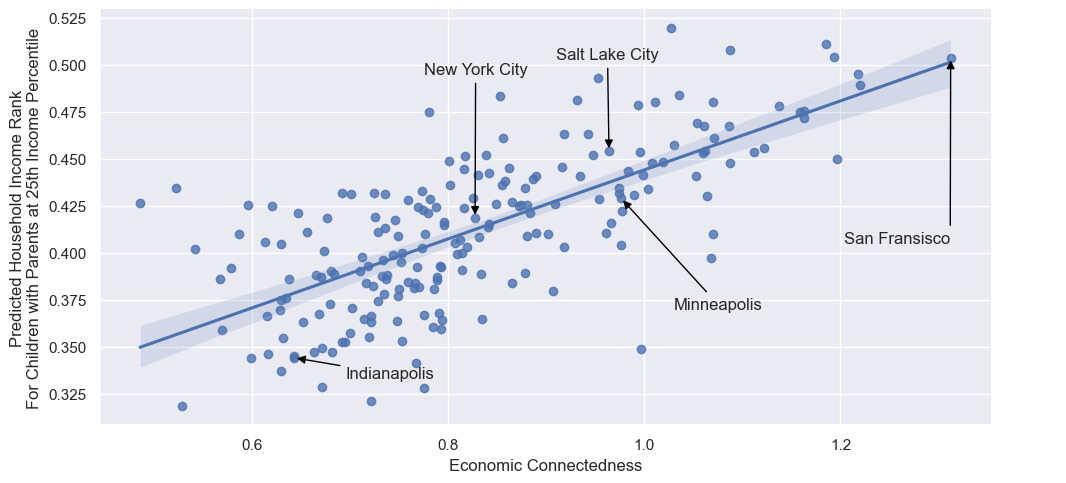

In [82]:
# Set seaborn style.
sns.set_theme(style='darkgrid')

# Create the plot through seaborn library.
plot = sns.lmplot(x = 'ec_county', y = 'kfr_pooled_pooled_p25', aspect = 2, data = question2_df)

# Set the x and y axis labels to the demanded ones.
plot.set(xlabel = "Economic Connectedness",
         ylabel ="Predicted Household Income Rank\nFor Children with Parents at 25th Income Percentile")

# Annotate the five demanded counties with the arrows characteristics that will
# have the starting - xytext (label not arrow's edge) and ending point - xy, 
# the arrow's type, color and label.

# New York City.
plt.annotate('New York City', xy=(0.82734, 0.418693), xytext=(0.775, 0.495),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# Salt Lake City
plt.annotate('Salt Lake City', xy=(0.96395, 0.454131), xytext=(0.91, 0.503),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# San Fransisco.
# Replicate the demanded figure.
plt.annotate('San Fransisco                       ', xy=(1.31244, 0.503888), xytext=(1.312, 0.405),
              arrowprops=dict(arrowstyle='-|>', color='black'),
              horizontalalignment ='center')

# Minneapolis.
plt.annotate('Minneapolis', xy=(0.97632, 0.428964), xytext=(1.03, 0.37),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# Indianapolis.
plt.annotate('Indianapolis', xy=(0.64282, 0.34408), xytext=(0.6955, 0.333),
              arrowprops=dict(arrowstyle='-|>', color='black'))

# Don't output the figure's text, just the plot.
_ = plt.show()

* Now we have replicate the [Figure 4 of the first paper](nature.com/articles/s41586-022-04996-4/figures/4) successfully !
* Our created figure looks like the demanded one ([here](data/demanded_figures/household_income_economic_connectedness.png)) !

---
## Question 3: Upward Income Mobility, Economic Connectedness, and Median House Income
---

For this question, we are asked to replicate the [Figure 6 of the first paper](https://www.nature.com/articles/s41586-022-04996-4/figures/6).

To be more precise, we are asked to create a scatter plot of Economic Connectedness against median household income (*based on the 2014–2018 ACS*) by ZIP code. 

According to the documentation, (*which you can find [here](data/papers/data_release_readme_31_07_2022_nomatrix.pdf)*), the Economic Connectednes is defined as twice the share of above-median-SES friends among below-median-SES individuals. 

We need also to point out the fact that, the color of the figure's dots corresponds to the child's income rank in adulthood given that the parents' income is in the 25th percentile and that the figure's colors correspond to five intervals, which are the quintiles dividing our data. 

Finally our figure should look like the one [here](data/demanded_figures/upward_mobility_connectedness_parental_income.png).

---
### Obtain the data for Question 3
---

Regarding the current question, we need to download data from two different sources and then merge them together properly.

From the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas), we download the `social_capital_zip.csv` *(which you can find it [here](data/social_capital_zip.csv) or [here]( https://data.humdata.org/dataset/85ee8e10-0c66-4635-b997-79b6fad44c71/resource/ab878625-279b-4bef-a2b3-c132168d536e/download/social_capital_zip.csv)*). 

This CSV file contains measures of USA Social Capital for counties, from which we are mainly intrested on the the Economic Connectedness metric, indexed by the county's ZIP code.

The downloaded dataset will be loaded to a temporary dataframe - which will be merged afterward to the final one of the current question.

It is worthing to point out that, we will not keep all the columns of the dataset, but only the ones that we though that are necessary to create our figure *(`zip`, `ec_zip`)*.

These columns, are briefly described below *(the definitions are based on the [Social Capital Atlas' documentation (section 2.2)](data/papers/data_release_readme_31_07_2022_nomatrix.pdf))*:

* `zip`: 5-digit ZIP code tabulation area code.
* `ec_zip`: the baseline definition of Economic Connectedness.

With the commands that presented below, we aim to define the path of dataset *(which are locally stored)* and load the dataset to a pandas dataframe. 
In addition, we set the index to be the `zip` column, in order to help us with the merging procedure afterwards.

In [24]:
# Get the path.
path = os.path.abspath('data/social_capital_zip.csv')

# First Question 3's dataframe, question3_df_first_part.
question3_df_first_part = pd.read_csv(path, usecols=["zip", "ec_zip"],
                          index_col='zip')

# Preview the dataframe.
question3_df_first_part.head(10)
# question3_df_first_part.sample(10)

,ec_zip
zip,
1001,0.88157
1002,1.18348
1003,1.37536
1005,1.15543
1007,1.19240
1008,NaN
1010,0.73856
1011,NaN
1013,0.69744


* From the *`question3_df_first_part`* dataframe's preview we can notice that there are *missing values - NaN*  in the `ec_zip` column.


* Since we do not know if the other dataframe contains missing values as well, we decide to check this issue after merging the dataframes *(missing values detection process will take place for all columns of the final dataframe)*.

Therefore, we move forward to the second data source from where we are going to download the data. 

The dataset can be found at the [Opportunity Insights](https://opportunityinsights.org/) website. 
To be more precise, we move on the *data* section of the website ([here](https://opportunityinsights.org/data/)), where we can find the `Social Capital II: Determinants of Economic Connectedness` section followed by the `Social Capital I: Measurement and Associations with Economic Mobility` one.


Both of the aforementioned ones, contain the [Replication Code and Data](https://opportunityinsights.org/wp-content/uploads/2022/08/social_capital_replication.zip) ZIP file, which are leading to the same compressed file download link, from where we download and store locally at the `data` folder the `social_capital_replication.zip`. 

Then, we unzip the compressed file and by following the provided instruction, we decide to load the STATA data file `zip_covariates.dta` *(which you can find [here](data/zip_covariates.dta))*.

As we did earlier, we will not keep all the columns of the dataset, but only the ones that we though that are necessary to create our figure *(`zip`, `kfr_pooled_pooled_p25`, `med_inc_2018`)*.

These columns, are briefly described below (the definitions are based on the [Social Capital Replication's documentation (section 3.2)](data/social_capital_replication/replication_package_README.pdf)):

* zip: 5-digit ZIP code tabulation area code.
* kfr_pooled_pooled_p25: the mean income percentile in adulthood of a child born to parents at the 25th percentile of the income distribution.
* med_inc_2018: the median household income in 2018, from the ACS.

In the following commands we will define the path and then load the STATA data file to `question3_df_second_part` dataframe, indexed by the 'zip' column *- as we did earlier for merging purposes*.

In [25]:
# Get the path.
path = os.path.abspath('data/social_capital_replication/Other public covariate data/zip_covariates.dta')

# Second Question 3's dataframe, question3_df_second_part.
question3_df_second_part = pd.read_stata(path, columns=["zip", "kfr_pooled_pooled_p25","med_inc_2018"],
                           index_col='zip') 


# Preview the dataframe.
question3_df_second_part.head(10)
# question3_df_second_part.sample(10)

,kfr_pooled_pooled_p25,med_inc_2018
zip,,
36006,0.375984,47148.0
36067,0.351230,53578.0
36749,0.356113,37054.0
36066,0.404268,62089.0
36051,0.360447,69423.0
36003,0.339764,27841.0
36530,0.400974,47321.0
36551,0.377224,54976.0
36550,0.384642,NaN


* We can notice that there are *missing values - NaN*  in the `med_inc_2018` column.
* We will explore the missing values of the *merged* dataframe after we create it. 


* Now, we perform the merge of the two dataframes.
* To do so, we apply the following commands:

In [26]:
# Merge the two dataframes.
question3_df = pd.merge(question3_df_first_part, question3_df_second_part, left_on='zip', right_on='zip')

# Preview the dataframe.
question3_df.head(10)
# question3_df.sample(10)

,ec_zip,kfr_pooled_pooled_p25,med_inc_2018
zip,,,
1001,0.88157,0.468741,62144.0
1002,1.18348,0.475851,55858.0
1003,1.37536,NaN,2499.0
1005,1.15543,0.407809,68278.0
1007,1.19240,0.476621,93300.0
1008,NaN,0.464829,75250.0
1010,0.73856,0.492584,84471.0
1011,NaN,0.467229,64904.0
1013,0.69744,0.409169,40594.0


* As we can notice the *merged dataframe*, `question3_df` contains also - as expected - missing values.

* Thus, we will check the dataframe's columns for *missing values*:

In [27]:
# Check for missing values in all columns of the dataframe.
question3_df.isnull().sum()

ec_zip                   4041
kfr_pooled_pooled_p25      17
med_inc_2018              136
dtype: int64

* The above output indicates the existance of *missing values* in our dataframe.


* To be more presice, we observe that there are:
    * ec_zip:                   **4041** missing values
    * kfr_pooled_pooled_p25:    **17** missing values
    * med_inc_2018:             **136** missing values
    
    


* Lets have a look at out dataframe's number of rows and columns.
* We will utilize it as a further evaluation measure, in order to be sure that the *missing values* will be dropped and the dataframe's shape will be changed.

In [28]:
# Output the number of rows and columns of the dataframe.
question3_df.shape 

(23019, 3)

* Our dataframe initially contains **23019** rows and **4** columns.


* We will drop the *missing values* from our dataframe with the following command and then we will evaluate our adjustments through a comparison between the dataframe's number of rows *(the number of columns obviously will not change)* prior and after the adjustment.

In [29]:
# Drop the NAs from the dataframe.
question3_df = question3_df.dropna()

# Output the number of rows and columns of the dataframe, after the adjustments.
question3_df.shape

(18913, 3)

* After the adjustments took place, our dataframe now contains **18913** rows and **4** columns.


* Now, when we observe carefully the demanded *[figure](data/demanded_figures/upward_mobility_connectedness_parental_income.png)*, we can notice that there are no data points whose median household income value (x-axis) is either greater than **30000** or less than **100000**.


* Thus, in order to make a close replication to the given figure, we need to limit the range of the values to accept only data points that belong in the range **[30000, 100000]**.


* In other words, we categorize the data points *(which actually are dataframe's rows)* that do not satisfy the above condition  as **outliers**.


* So, before removing them let's plot a boxplot of the median household income *(`med_inc_2018`)*, in order to validate the 'outliers assumption' that have been inspected and described above.


* To be more practical, we will create a boxplot for the *(`med_inc_2018`)* through the [seaborn](http://seaborn.pydata.org/) library (also you can find more for seaborn.boxplot [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html)), with the following command:



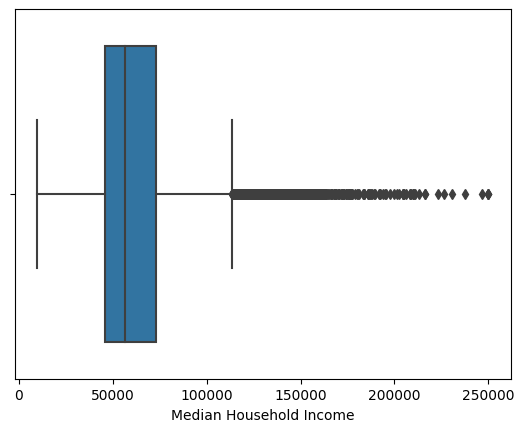

In [30]:
# Create a Boxplot through Seaborn - and rename x-axis for easier interpretation.
_ = sns.boxplot(x=question3_df['med_inc_2018']).set(xlabel='Median Household Income')

* As we can observe, there are lots of outliers presented in the above boxplot, especially with values that exceed 100000.
* We move forward and we drop all the outliers.

In [31]:
question3_df = question3_df[(question3_df.med_inc_2018 >= 30000) & (question3_df.med_inc_2018 <= 100000)]

* Let's plot again the boxplot to preview the adjustments we made above - we expect to do not have outliers.

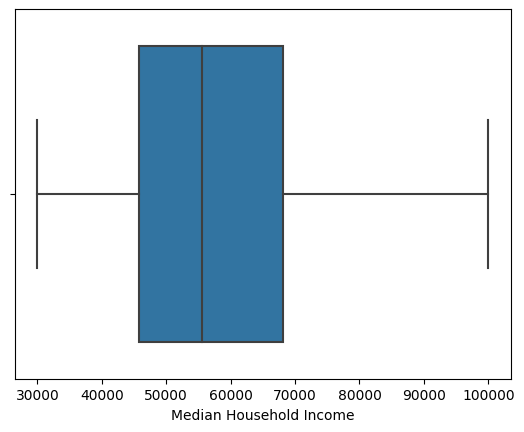

In [32]:
# Create an updated Boxplot through Seaborn - and again rename x-axis for easier interpretation.
_ = sns.boxplot(x=question3_df['med_inc_2018']).set(xlabel='Median Household Income')

* As we expected it, there are no outliers in the `med_inc_2018`'s boxplot. 

* Let's preview our dataframe once again before moving one to the plotting procedure. 

In [33]:
# Preview the dataframe.
question3_df.sample(10)

,ec_zip,kfr_pooled_pooled_p25,med_inc_2018
zip,,,
26034,0.78142,0.414874,45214.0
79504,0.83402,0.486230,47202.0
75574,0.87662,0.433749,56371.0
68047,1.20386,0.460885,63676.0
23690,0.87550,0.350478,49509.0
75147,0.83288,0.442852,44559.0
11368,0.47133,0.439823,50797.0
49254,0.81285,0.371173,48010.0
74434,0.85529,0.408065,53639.0


* From the above outputs, we can observe that the `kfr_pooled_pooled_p25` column are not in the format that the demanded figure expected to be.
* More specifically, to fix this issue we could either to multiple by 100 *(e.g. to make 0.377496 --> 37.7496)* or scale down the bins to make the assignments properly *(e.g. instead of < 38 we will assign the values to < 0.38's color)*.
* We decide to move forward with the second approach and scale down the bins.
* We will create a colunm with the assigned color according to the `kfr_pooled_pooled_p25` value.

In [34]:
# Create the bins to depicted the demanded figure (scaled down by 100).
bins = [0, 0.38, 0.41, 0.44, 0.48, 1]

colors = ["#cd0000", "#ffa500", "#ffe4c4", "#009acd", "#191970"]

question3_df["colors_categories"] = pd.cut(question3_df["kfr_pooled_pooled_p25"], bins=bins, labels=colors)

# Output the results for evaluation purposes.
print (question3_df)

        ec_zip  kfr_pooled_pooled_p25  med_inc_2018 colors_categories
zip                                                                  
1001   0.88157               0.468741       62144.0           #009acd
1002   1.18348               0.475851       55858.0           #009acd
1005   1.15543               0.407809       68278.0           #ffa500
1007   1.19240               0.476621       93300.0           #009acd
1010   0.73856               0.492584       84471.0           #191970
...        ...                    ...           ...               ...
99840  1.11489               0.485863       72237.0           #191970
99901  0.99517               0.404646       70356.0           #ffa500
99921  0.87977               0.294530       58571.0           #cd0000
99926  0.87888               0.277356       53409.0           #cd0000
99929  1.06344               0.392887       57583.0           #ffa500

[16823 rows x 4 columns]


* We can now create our scatterplot.

In [ ]:
# Set style.
sns.set_style('darkgrid')

# Define width and height of plot
# (to mach the datapoint inside the legend - between > 48 and 44 - 48).
fig = plt.figure()
fig.set_figwidth(10.5)
fig.set_figheight(6)

# Get the colors to the plot's legend.
plt.scatter([],[],color=colors[4]) 
plt.scatter([],[],color=colors[3])
plt.scatter([],[],color=colors[2])
plt.scatter([],[],color=colors[1])
plt.scatter([],[],color=colors[0])

# Create scatterplot.
scatter = plt.scatter(x = question3_df.med_inc_2018, 
                 y = question3_df.ec_zip, 
                 color = question3_df.colors_categories, 
                 alpha=0.55) 

# Parse axes' names, and legend. 
plt.xlabel('Median Household Income in ZIP Code (US$)')
plt.ylabel('Economic Correctedness')
plt.legend(['> 48','44 - 48','41 - 44','38 - 41','< 38'],
           title="Upward Mobility",loc='lower right')

# Output the plot.
plt.show()

* Finally, we create a replication of *[Figure 6 of the first paper](https://www.nature.com/articles/s41586-022-04996-4/figures/6)* that is very similar with the demanded [one](data/demanded_figures/upward_mobility_connectedness_parental_income.png) !

---
## Question 4: Friending Bias and Exposure by High School
---

In this section of the current assignement, we are asked to replicate the [Figure 5a of the second paper](https://www.nature.com/articles/s41586-022-04997-3/figures/5). 
This particular figure, presents the share of students with high parental Socioeconomic Status (SES) against the friending bias of students of low parental SES.

The datasets used for this figure can be found on the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) website.

---
### Obtain the data for Question 4
---

To obtain the dataset for this question we visited the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) website.


From the provided datasets we download the `social_capital_high_school.csv` which we store locally at the `data` folder of the deliverable zip file.


As we did to the previous questions, we will select and keep only a portion of the columns of the whole dataset. 


Complimentary, more information regarding all the dataset's columns you can find on the 2.3. section of the [documentation](data/papers/data_release_readme_31_07_2022_nomatrix.pdf).


Therefore, the necessary variables we decide to kept for this question and will be used for ploting our graph are the following:
   - `high_school`: 12-digit NCES school ID.
   - `high_school_name`: the name of the high school. 
   - `ec_parent_ses_hs`: the Economic connectedness with parental SES
   - `exposure_parent_ses_hs`: the mean exposure to high-parental-SES individuals by high school for
      low-parental-SES individuals: two times the average share of high parental-SES individuals within three birth cohorts, averaged over low-parental-SES users.
   - `bias_parent_ses_hs`: the result of the ec_own_ses_hs divided by exposure_own_ses_hs, all subtracted from one.
   

So, the initial step is to load the dataset and preview the created dataframe.

In [256]:
# Get the dataset's path.
path = os.path.abspath('data/social_capital_high_school.csv')

# Load the CSV to a dataframe (keeping only the necessary columns).
question4_df = pd.read_csv(path, usecols=["high_school", "high_school_name", "ec_parent_ses_hs", 
                                          "exposure_parent_ses_hs", "bias_parent_ses_hs"])

# Preview the dataframe.
# question4_df.sample(10)
question4_df.head(10)

,high_school,high_school_name,ec_parent_ses_hs,exposure_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN,NaN
1,00000226,John Carroll Catholic HS,1.43847,1.44259,0.00285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN,NaN
4,00000758,St Paul's Episcopal School,1.57592,1.57514,-0.00050
5,00000827,Marengo Academy HS,NaN,NaN,NaN
6,00000871,John T Morgan Academy,NaN,NaN,NaN
7,00000882,Jefferson Christian Academy,NaN,NaN,NaN
8,00000962,Glenwood School,NaN,NaN,NaN
9,00000973,Mars Hill Bible School,1.25137,1.24434,-0.00565


* From the above preview of the dataset we can observe that *missing values - NAs* exist in our dataframe.
* However, we will take care of this issue later.


* Now we will follow the question's instructions and divide by two the `ec_parent_ses_hs`, in order to get the get the share of high-parental-SES students, which is the 𝑥-axis of our plot, we need to take the economic connectedness with parental SES.


*(We initially though that the proper column to divide and later plot according to the definitions would be the `exposure_parent_ses_hs`, however the `ec_parent_ses_hs` when used for the demanded plot gives us exactly the same results regarding the data points location, etc.).*


* We perform the above mentioned with the following command:

In [257]:
# Divide the ec_parent_ses_hs column by 2.
question4_df.ec_parent_ses_hs = question4_df.ec_parent_ses_hs.div(2)

# Preview the dataframe.
question4_df.head(10)

,high_school,high_school_name,ec_parent_ses_hs,exposure_parent_ses_hs,bias_parent_ses_hs
0,00000044,Holy Spirit Catholic School,NaN,NaN,NaN
1,00000226,John Carroll Catholic HS,0.719235,1.44259,0.00285
2,00000237,Holy Family Cristo Rey Catholic HS,NaN,NaN,NaN
3,00000714,Montgomery Catholic Preparatory School,NaN,NaN,NaN
4,00000758,St Paul's Episcopal School,0.787960,1.57514,-0.00050
5,00000827,Marengo Academy HS,NaN,NaN,NaN
6,00000871,John T Morgan Academy,NaN,NaN,NaN
7,00000882,Jefferson Christian Academy,NaN,NaN,NaN
8,00000962,Glenwood School,NaN,NaN,NaN
9,00000973,Mars Hill Bible School,0.625685,1.24434,-0.00565


* The above output, is not to the demanded scale, therefore we have to multiple the x-axis variable `ec_parent_ses_hs` and the y-axis variable `bias_parent_ses_hs` with `100` to create the demanded percentages.

* Before doing so, we will drop the `exposure_parent_ses_hs`, since it is not the proper one to replicate the demanded figure.

In [258]:
del question4_df['exposure_parent_ses_hs']

Now, we multiple the x-axis variable `ec_parent_ses_hs` and the y-axis variable `bias_parent_ses_hs` with `100` to create the demanded percentages.

In [259]:
# Multiple the two columns with 100 to create the demanded percentages.
question4_df.ec_parent_ses_hs = question4_df.ec_parent_ses_hs.mul(100)
question4_df.bias_parent_ses_hs = question4_df.bias_parent_ses_hs.mul(100)

# Preview the dataframe.
question4_df.sample(10)

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
3044,062271003325,San Fernando Sr HS,15.577000,5.997
12821,403360229844,Fort Cobb-Broxton HS,NaN,NaN
1959,02042016,Valley Christian School,NaN,NaN
7328,240012000458,Randallstown HS,44.971499,0.641
5533,172655002843,Monticello HS,59.237500,0.557
6914,220009001541,Dutchtown HS,72.561000,-1.591
2175,040625000508,Cactus HS,55.202500,0.067
14860,482364002462,Furr HS,23.504500,-12.512
16028,530159001758,Columbia HS,60.903000,-4.064
12341,390499303761,Glenoak HS,48.196500,2.540


* From the above output we can validate the scale of the axes' variables.

* Now, let's take a look at the NA values.

In [260]:
# Check for missing values in all columns of the dataframe.
question4_df.isnull().sum()

high_school              0
high_school_name         0
ec_parent_ses_hs      5917
bias_parent_ses_hs    5917
dtype: int64

* There are **5917** missing values in our dataframe, and more particular to the columns `ec_parent_ses_hs` and `bias_parent_ses_hs`.


* Therefore, since our plot is based on these two columns, that present the missing values, we are going to drop them.

In [261]:
# Drop the NAs from the dataframe.
question4_df = question4_df.dropna()

* Let's validate it.

In [262]:
# Check for missing values in all columns of the dataframe.
question4_df.isnull().sum()

high_school           0
high_school_name      0
ec_parent_ses_hs      0
bias_parent_ses_hs    0
dtype: int64

* There are no missing values !

* Thus, we will create a sub-dataframe to preview the high schools that we need to denote in the final plot.

In [263]:
# Define codes for schools that we add arrows. 
codes = ['00941729',     '060474000432', '170993000942', 
         '170993001185', '170993003989', '171449001804', 
         '250327000436', '360009101928', '370297001285', 
         '483702004138', '250843001336', '062271003230', 
         '010237000962', '00846981',     '00852124']

# Create and preview the dataframe with the demanded HS.
df_hs = question4_df[question4_df['high_school'].isin(codes)]
df_hs

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
797,00846981,Bishop Gorman HS,78.055000,0.564
805,00852124,Phillips Exeter Academy,79.206995,-1.380
987,00941729,Dalton School,71.367500,-0.778
1273,010237000962,John L Leflore Magnet School,23.006500,-5.177
2662,060474000432,Berkeley HS,51.010000,11.372
3041,062271003230,North Hollywood Sr HS,28.193501,16.764
5266,170993000942,Lane Technical HS,48.674500,-1.742
5285,170993001185,Lincoln Park HS,45.452500,3.471
5294,170993003989,Payton College Preparatory HS,66.246005,0.493
5403,171449001804,Evanston Twp HS,57.774000,11.782


* From the above output, we observe that some school names are **not** the same with demanded plot's ones.



* To be more precise, these are the followings: 
    * 010237000962: **John L Leflore Magnet School --> Leflore Magnet HS**.
    * 062271003230: **North Hollywood Sr HS --> North Hollywood HS**.
    * 170993003989: **Payton College Preparatory HS --> Walter Payton College Prep**.
    * 171449001804: **Evanston Twp HS --> Evanston Township HS**.
    * 250327000436: **Cambridge Rindge And Latin --> Cambridge Rindge And Latin School**.
    
    
* We will rename these high schools as we mention above.

In [264]:
# Rename the HS names as the denoted arrows.
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['John L Leflore Magnet School'], 'Leflore Magnet HS')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['North Hollywood Sr HS'], 'North Hollywood HS')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['Payton College Preparatory HS'], 'Walter Payton College Prep')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['Evanston Twp HS'], 'Evanston Township HS')
question4_df['high_school_name'] = question4_df['high_school_name'].replace(['Cambridge Rindge And Latin'], 'Cambridge Rindge And Latin School')

* Now we validate our changes below:

In [265]:
# Create and preview the dataframe with the demanded HS.
df_hs = question4_df[question4_df['high_school'].isin(codes)]
df_hs

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
797,00846981,Bishop Gorman HS,78.055000,0.564
805,00852124,Phillips Exeter Academy,79.206995,-1.380
987,00941729,Dalton School,71.367500,-0.778
1273,010237000962,Leflore Magnet HS,23.006500,-5.177
2662,060474000432,Berkeley HS,51.010000,11.372
3041,062271003230,North Hollywood HS,28.193501,16.764
5266,170993000942,Lane Technical HS,48.674500,-1.742
5285,170993001185,Lincoln Park HS,45.452500,3.471
5294,170993003989,Walter Payton College Prep,66.246005,0.493
5403,171449001804,Evanston Township HS,57.774000,11.782


* As we can see the changes we perform have been applied to the dataframe.


* To further clarify that, we will search for the high school `Walter Payton College Prep`, which was intially named as `Payton College Preparatory HS`. 


* We expect the first research to return an entry of the dataframe, while the second one not - since it is renamed. 

In [266]:
question4_df[question4_df['high_school_name'] == 'Walter Payton College Prep']

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs
5294,170993003989,Walter Payton College Prep,66.246005,0.493


In [267]:
question4_df[question4_df['high_school_name'] == 'Payton College Preparatory HS']

,high_school,high_school_name,ec_parent_ses_hs,bias_parent_ses_hs


* Our expectations have been validated !


* Let's have a look at the $x$-axis and $y$-axis variables to check if we have values that will be out of range in our figure.

In [278]:
print('Max y-axis value:', question4_df['bias_parent_ses_hs'].max())
print('Min y-axis value:', question4_df['bias_parent_ses_hs'].min())
print('Max x-axis value:', question4_df['ec_parent_ses_hs'].max())
print('Min x-axis value:', question4_df['ec_parent_ses_hs'].min())

Max y-axis value: 28.413999
Min y-axis value: -20.085
Max x-axis value: 92.1295
Min x-axis value: 8.5550005


* We observe that there are values under -15 ($y$-axis value), therefore we will reject these values and drop them.
* We estimate that this procedure is also followed at the creation of the demanded figure - since there are no data points with less than -15). 

In [282]:
question4_df = question4_df[(question4_df['bias_parent_ses_hs'] >= -15)]

* Now we can move forward and create our plot.

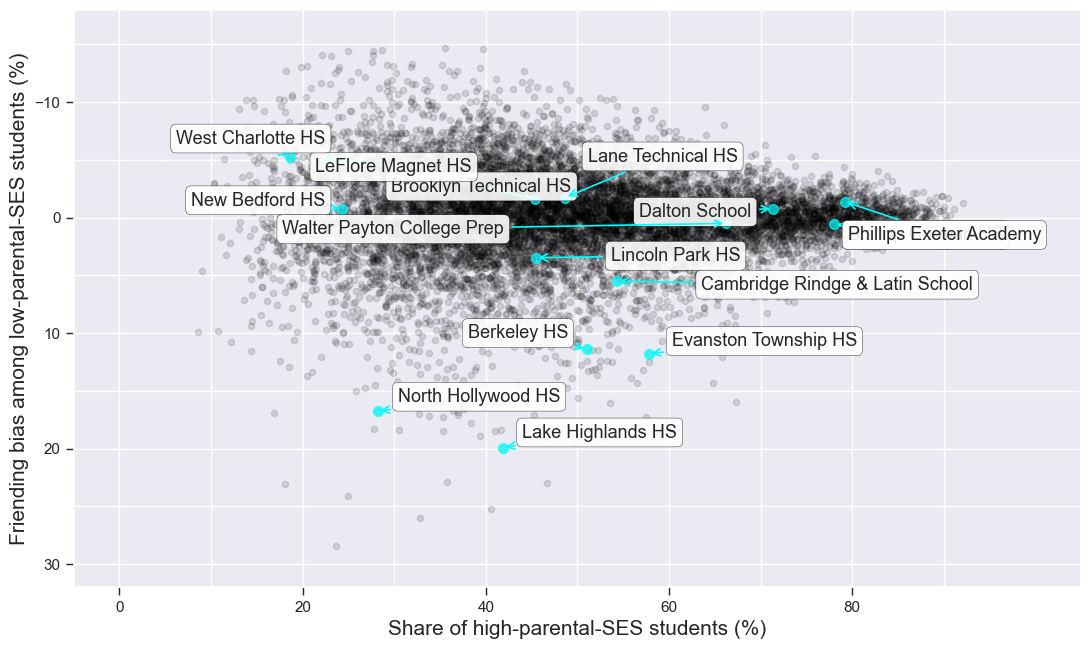

In [363]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker 

# Set the theme with the dark grid background.
sns.set_style('darkgrid')

# Set the dimensions of the figure.
fig, ax = plt.subplots()
fig.set_figwidth(13)
fig.set_figheight(7.5)

# Create the scatter plot with the distinguish highschools that have different color.
ax.scatter(question4_df['ec_parent_ses_hs'], question4_df['bias_parent_ses_hs'], color = 'black', alpha= 0.12, s = 20)

# Plot's limits.
plt.xlim([-5, 105])
plt.ylim([-18, 32])

# Set up arrow's style.
myarrow = dict(arrowstyle = '->', connectionstyle = "arc3", 
               color = "aqua", linewidth = 1.2)

# Set up bbox's style.
mybbox = dict(boxstyle = "round,pad=0.3", facecolor = "white",
              alpha = 0.9, edgecolor = "black", linewidth = 0.3)

#############################
# Denoted HS - Add arrows:
#############################

# Bishop Gorman HS.
ax.scatter(x = 78.0549, y = 0.56400001, color = "aqua", s = 50, alpha = 0.7)
ax.annotate('Bishop Gorman HS', bbox = mybbox, xy = (78.0549, 0.56400001),
             xytext = (79.5, 1.5), textcoords = 'data', arrowprops = myarrow, 
             ha = 'left', fontsize = 13, va = 'center')


# Phillips Exeter Academy.
ax.scatter(x = 79.206995, y = -1.38, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Phillips Exeter Academy', bbox = mybbox, xy = (79.206995, -1.38),
             xytext = (79.5, 1.5), textcoords = 'data', arrowprops = myarrow, 
             ha = 'left', fontsize = 13, va = 'center')


# Dalton School.
ax.scatter(x = 71.367499, y = -0.77800001, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Dalton School', bbox = mybbox, xy = (71.367499, -0.77800001),
             xytext = (69, -0.5), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# Brooklyn Technical HS.
ax.scatter(x = 45.3805, y = -1.6140001, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Brooklyn Technical HS', bbox = mybbox, xy = (45.3805, -1.6140001),
             xytext = (49.38, -2.7), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# Berkeley HS.
ax.scatter(x = 51.01, y = 11.372, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Berkeley HS', bbox = mybbox, xy = (51.01, 11.372), 
             xytext = (49, 10), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# Leflore Magnet HS.
ax.scatter(x = 23.0065004, y = -5.1770002, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('LeFlore Magnet HS', bbox = mybbox, xy = (23.0065004,  -5.1770002),
             xytext = (38.5, -4.4), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')
             
    
# North Hollywood HS.
ax.scatter(x = 28.1935, y = 16.764, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('North Hollywood HS', bbox = mybbox, xy = (28.1935, 16.764000),
             xytext = (30.4, 15.5), textcoords = 'data', arrowprops = myarrow, 
             ha = 'left', fontsize = 13, va = 'center')


# Lane Technical HS.
ax.scatter(x = 48.67449, y = -1.7419999, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Lane Technical HS', bbox = mybbox, xy = (48.67449, -1.7419999), 
             xytext = (67.5, -5.3), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# West Charlotte HS.
ax.scatter(x = 18.6619, y = -5.28399, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('West Charlotte HS', bbox = mybbox, xy = (18.6619, -5.28399),
             xytext = (22.5, -6.85), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# Lincoln Park HS.
ax.scatter(x = 45.4524995, y = 3.4710001, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Lincoln Park HS', bbox = mybbox, xy = (45.4524995, 3.4710001), 
             xytext = (67.8, 3.3), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# Walter Payton College Prep.
ax.scatter(x = 66.246005, y = 0.49299998, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Walter Payton College Prep', bbox = mybbox, xy = (66.246005, 0.49299998), 
             xytext = (42, 1), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# New Bedford HS.
ax.scatter(x = 24.26099, y = -0.764, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('New Bedford HS', bbox = mybbox, xy = (24.26099, -0.764), 
             xytext = (22.5, -1.5), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# Evanston Township HS.
ax.scatter(x = 57.774, y = 11.782, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Evanston Township HS', bbox = mybbox, xy = (57.774, 11.782), 
             xytext = (80.53, 10.7), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


# Cambridge Rindge And Latin School.
ax.scatter(x = 54.315999, y = 5.497, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Cambridge Rindge & Latin School', bbox = mybbox, xy = (54.315999, 5.497),
             xytext = (93.2, 5.8), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')


#  Lake Highlands HS.
ax.scatter(x = 41.8704985, y = 19.902, color = 'aqua', s = 50, alpha = 0.7)
ax.annotate('Lake Highlands HS', bbox = mybbox, xy = (41.8704985, 19.902), 
             xytext = (60.9, 18.6), textcoords = 'data', arrowprops = myarrow, 
             ha = 'right', fontsize = 13, va = 'center')
 
     
# Reverse y-axis.
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

# Set the tickers location as the replication figure's one.
ax.yaxis.set_major_locator(ticker.FixedLocator([-10, 0, 10, 20, 30]))
ax.yaxis.set_minor_locator(ticker.FixedLocator([-15, -5, 5, 15, 25]))
ax.xaxis.set_major_locator(ticker.FixedLocator([0, 20, 40,  60,  80]))
ax.xaxis.set_minor_locator(ticker.FixedLocator([10, 30, 50, 70, 90]))

# Set grid and ticks parameters.
ax.grid(which='minor', color='white')
ax.tick_params(which= 'major', direction='out',axis='both', width=1, zorder= 3, bottom=True, left=True)

# Set the axis labels.
plt.xlabel("Share of high-parental-SES students (%)",fontsize=15)
plt.ylabel("Friending bias among low-parental-SES students (%)",fontsize=15)

# Output the plot.
plt.show()

* The plot has been created and it is an identical replication of the demanded [one](data/demanded_figures/friending_bias_exposure.png) !

---
## Q5: Friending Bias vs. Racial Diversity
---

In the final question of this assignment we will replicate the [Extended Data Figure 3](https://www.nature.com/articles/s41586-022-04997-3/figures/9) of the second paper. 
The exact demanded figure, you can find it [here](data/demanded_figures/friending_bias_racial_diversity.png). 

The demanded figure depicts friending bias against racial diversity.
The `racial diversity` is defined by the [Herfindahl-Hirschman Index (HHI)](https://en.wikipedia.org/wiki/Herfindahl%E2%80%93Hirschman_index), borrowed from investing.

In our case, it is $ 1−\sum_{i}{s_i}^2$, where $s_i$ is the fraction of race/ethnicity $i$ (Black, White, Asian, Hispanic, Native American).


We need also to point out that regarding the $x$-axis and $y$-axis we have the following instructions:


* For the mean of the $x$-axis variable, the HHI index, is the weighted mean of HHI:

    * For the college plot, the weights are given by the mean number of students per cohort.

    * For the neighborhood plot, the weights are given by the number of children with below-national-median parental household income.


* The $y$-axis variable:

    * For the college plot, it is the mean of the college friending bias.

    * For the neighborhood plot, it is the mean of the neighborhood friending bias.
    
---
### Obtain the data for Question 5
---

To obtain the dataset for the fifth and final question of the current assignment we need to download various datasets in various formats (CSVs and STATA data files), which later will be combined and assembly the final dataframe *`question5_df`*.


To obtain the datasets we visited the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) and the [Opportunity Insights](https://opportunityinsights.org/data/) websites. 

From the above websites we download the following:

* From the [Social Capital Atlas](https://data.humdata.org/dataset/social-capital-atlas) website:

   * `social_capital_zip.csv`, which you can find it online [here](https://data.humdata.org/dataset/85ee8e10-0c66-4635-b997-79b6fad44c71/resource/ab878625-279b-4bef-a2b3-c132168d536e/download/social_capital_zip.csv) or locally downloaded [here](data/social_capital_zip.csv).
   
   * `social_capital_college.csv`, which you can find it online [here](https://data.humdata.org/dataset/85ee8e10-0c66-4635-b997-79b6fad44c71/resource/7bd697cf-c572-47a6-b15b-8450cc5c7ef8/download/social_capital_college.csv) or locally downloaded [here](data/social_capital_college.csv).
   

* From the [Opportunity Insights](https://opportunityinsights.org/data/) website:

   * `Replication Code and Data` zip file, which you can find it online [here](https://opportunityinsights.org/wp-content/uploads/2022/08/social_capital_replication.zip) or locally downloaded [here](data/social_capital_replication.zip).
   
   From the zip file `social_capital_replication.zip` after we unzip it, we will utilize the following two STATA data files:
       
       * `zip_covariates.dta`, which you can find it locally downloaded [here](data/zip_covariates.dta).
       
       * `college_characteristics.dta`, which you can find it locally downloaded [here](data/college_characteristics.dta).
       
It goes without saying that we will not keep all the columns-variables of each dataset, but only the necessary ones for creating our final figure. 


More details regarding the datasets you can find here:
   * `Documentation of the Replication Code and Data`, which you can find it [here - replication_package_README.pdf](data\social_capital_replication\replication_package_README.pdf).
   
   * `Social Capital Codebook`, which you can find it [here - social_capital_codebook.pdf](data\social_capital_replication\social_capital_codebook.pdf).
   
   * `Codebook for Publicly Available Data on Social Capital`, which you can find it [here - data_release_readme_31_07_2022_nomatrix.pdf](data/papers/data_release_readme_31_07_2022_nomatrix.pdf).
   
---
To begin with, we will load the `social_capital_zip.csv` (you can find it [here](data/social_capital_zip.csv)) and create an initial dataframe *`question5_nbhd_first_df`*.

From this dataset we will keep only the following columns:
   * `zip`: the 5-digit ZIP code tabulation area code.
   * `nbhd_bias_zip`: nbhd_ec_zip divided by nbhd_exposure_zip, all subtracted from one.
   * `num_below_p50`: number of children with below-national-median parental household income.

We can do so with the following command:

In [156]:
# Get the dataset's path.
path = os.path.abspath('data/social_capital_zip.csv')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_nbhd_first_df = pd.read_csv(path, usecols = ['zip', 'nbhd_bias_zip', 'num_below_p50'])
                           
# Preview the dataframe.
# question5_nbhd_first_df.sample(10)
question5_nbhd_first_df.head(10)

,zip,num_below_p50,nbhd_bias_zip
0,1001,995.787468,-0.00336
1,1002,1312.117077,0.18724
2,1003,NaN,NaN
3,1005,381.519745,-0.00064
4,1007,915.396667,0.04162
5,1008,90.721764,NaN
6,1010,312.542969,NaN
7,1011,104.810677,NaN
8,1013,2616.550354,0.20223
9,1020,2002.082487,0.14469


Then we will load the second necessary file regarding the neighborhood part of the Question 5, `zip_covariates.dta` (you can find it [here](data/zip_covariates.dta) and create the dataframe *`question5_nbhd_second_df`*.

This dataset contains the following columns:
   * `zip`: the 5-digit ZIP code tabulation area code.
   * `share_white_2018`: the share white (2018), from the ACS.
   * `share_black_2018`: the share Black (2018), from the ACS.
   * `share_natam_2018`: the share Native American (2018), from the ACS.
   * `share_asian_2018`: the share Asian (2018), from the ACS. 
   * `share_hawaii_2018`: the share Hawaiian (2018), from the ACS.
   * `share_hispanic_2018`: the share Hispanic (2018), from the ACS.

To do so we execute the following command:

In [157]:
# Get the dataset's path.
path = os.path.abspath('data/zip_covariates.dta')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_nbhd_second_df = pd.read_stata(path, columns = ['zip','share_white_2018', 'share_black_2018',
                                                        'share_natam_2018', 'share_asian_2018',
                                                        'share_hawaii_2018','share_hispanic_2018'])
                           
# Preview the dataframe.
# question5_nbhd_second_df.sample(10)
question5_nbhd_second_df.head(10)

,zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018
0,36006,0.838992,0.110624,0.002191,0.000000,0.000000,0.010953
1,36067,0.713614,0.214885,0.004142,0.004978,0.000174,0.042155
2,36749,0.707317,0.292683,0.000000,0.000000,0.000000,0.000000
3,36066,0.766194,0.161858,0.003142,0.029376,0.000000,0.019165
4,36051,0.807217,0.177113,0.000000,0.000000,0.000000,0.015670
5,36003,0.445205,0.521602,0.007376,0.003161,0.000000,0.017387
6,36530,0.966278,0.003170,0.006629,0.000000,0.000000,0.020320
7,36551,0.824233,0.110754,0.014509,0.000000,0.000000,0.036217
8,36550,0.218814,0.781186,0.000000,0.000000,0.000000,0.000000
9,36507,0.718863,0.237781,0.007694,0.001810,0.000000,0.024122


On a similar note, we create the first of the two dataframes for the college part of the assignment, *`question5_college_first_df`*.

The dataset to create this dataframe is the `social_capital_college.csv` (you can find it [here](data/social_capital_college.csv)).


This dataframe will contain the following variables:
   * `college`: the 6-digit Office of Postsecondary Education Identification identifier (OPEID), times 100.
   * `mean_students_per_cohort`: the mean number of students per cohort.
   * `bias_own_ses_college`: ec own ses college divided by exposure own ses college, all subtracted from one.
   
We create the dataframe with following command:

In [159]:
# Get the dataset's path.
path = os.path.abspath('data/social_capital_college.csv')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_college_first_df = pd.read_csv(path, usecols = ['college', 
                                                          'bias_own_ses_college', 
                                                          'mean_students_per_cohort'])
                           
# Preview the dataframe.
# question5_college_first_df.sample(10)
question5_college_first_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college
0,100200,943.666667,-0.01200
1,100300,227.666667,-0.05807
2,100400,494.000000,-0.00504
3,100500,NaN,-0.03664
4,100700,NaN,0.05010
5,100800,NaN,-0.03763
6,100900,3839.000000,0.03599
7,101200,288.666667,-0.00799
8,101300,1604.333333,0.04682
9,101500,289.000000,0.09889


* Before moving forward to the latest dataframe, we multiple by *100* the `bias_own_ses_college` column, since we need percentages.

In [160]:
# Multiple by 100 the 'bias_own_ses_college' column.
question5_college_first_df.bias_own_ses_college = question5_college_first_df.bias_own_ses_college.mul(100)

# Preview the dataframe.
# question5_college_first_df.sample(10)
question5_college_first_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college
0,100200,943.666667,-1.200
1,100300,227.666667,-5.807
2,100400,494.000000,-0.504
3,100500,NaN,-3.664
4,100700,NaN,5.010
5,100800,NaN,-3.763
6,100900,3839.000000,3.599
7,101200,288.666667,-0.799
8,101300,1604.333333,4.682
9,101500,289.000000,9.889


Now, we can move forward and create the fourth and latest initial dataframe, *`question5_college_second_df`*. 

The dataset used is the  `college_characteristics.dta` (you can find it locally downloaded [here](data/college_characteristics.dta)).

From it we keep the following columns:
   * `college`: the 6-digit Office of Postsecondary Education Identification identifier (OPEID), times 100.
   * `asian_or_pacific_share_fall_2000`: the share of asian or pacific undergraduate students in Fall 2000.
   * `black_share_fall_2000`: the share of black undergraduate students in Fall 2000.
   * `hisp_share_fall_2000`: the share of hispanic undergraduate students in Fall 2000.

In addition to the above columns, we will add the share of white undergraduate students in Fall 2000.


We need also to point out that the paper's figure ([here](https://www.nature.com/articles/s41586-022-04997-3/figures/9)) is created with data obtained from the 2013 Integrated Post-Secondary Education Data System (IPEDS) survey, while our data are from the 2000 survey. This way also is created the demanded replication figure ([here](data/demanded_figures/friending_bias_racial_diversity.png)).


We can do so with the following command:

In [142]:
# Get the dataset's path.
path = os.path.abspath('data/college_characteristics.dta')

# Load the CSV to a dataframe (keeping only the necessary columns).
question5_college_second_df = pd.read_stata(path, columns = ['college', 
                                      'asian_or_pacific_share_fall_2000',
                                      'black_share_fall_2000', 
                                      'hisp_share_fall_2000'])
                           
# Preview the dataframe.
# question5_college_second_df.sample(10)
question5_college_second_df.head(10)

,college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000
0,161000,0.716553,0.011714,0.018803
1,470100,0.056209,0.151004,0.299666
2,120600,0.260676,0.018759,0.136386
3,998900,0.036090,0.046617,0.401504
4,3695700,0.142595,0.027094,0.386812
5,122200,0.112693,0.157164,0.443674
6,111800,0.147487,0.046005,0.274466
7,771300,0.289951,0.036047,0.193907
8,853800,0.325995,0.074363,0.224879
9,450200,0.401386,0.085995,0.159117


---
### Neighborhood Plot of the Question 5
---

In this section we are going to create the final - ready to be plotted - dataframe, regarding the neighborhood plot (zip level).

For starters, we are going to perform a left join indexed on the zip column.

This way we have the following results.

In [166]:
# Merge the two neighborhood dataframes.
question5_nbhd_df = pd.merge(question5_nbhd_first_df, question5_nbhd_second_df, on='zip', how='left')

# Preview the dataframe.
question5_nbhd_df.head(10)
# question5_nbhd_df.sample(10)

,zip,num_below_p50,nbhd_bias_zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018
0,1001,995.787468,-0.00336,0.883491,0.019636,0.000341,0.025140,0.000000,0.055218
1,1002,1312.117077,0.18724,0.713397,0.059469,0.001796,0.108861,0.001131,0.073372
2,1003,NaN,NaN,0.704930,0.047784,0.004627,0.162217,0.000000,0.055526
3,1005,381.519745,-0.00064,0.944700,0.023041,0.000000,0.007814,0.000000,0.012422
4,1007,915.396667,0.04162,0.933387,0.005679,0.000000,0.033140,0.000000,0.013897
5,1008,90.721764,NaN,0.971596,0.000000,0.003342,0.000000,0.000000,0.016708
6,1010,312.542969,NaN,0.926986,0.036106,0.000000,0.004547,0.000000,0.026210
7,1011,104.810677,NaN,0.980663,0.002762,0.000000,0.001381,0.000000,0.007597
8,1013,2616.550354,0.20223,0.651420,0.037286,0.000347,0.022892,0.000000,0.276436
9,1020,2002.082487,0.14469,0.766223,0.032229,0.001994,0.020268,0.000000,0.163604


* Multiply by *100* the `nbhd_bias_zip`, since we want the percentage in the final plot.

In [167]:
# Multiply the `nbhd_bias_zip` column by 100.
question5_nbhd_df['nbhd_bias_zip'] = question5_nbhd_df['nbhd_bias_zip']*100

# Preview the dataframe.
question5_nbhd_df.head(10)

,zip,num_below_p50,nbhd_bias_zip,share_white_2018,share_black_2018,share_natam_2018,share_asian_2018,share_hawaii_2018,share_hispanic_2018
0,1001,995.787468,-0.336000,0.883491,0.019636,0.000341,0.025140,0.000000,0.055218
1,1002,1312.117077,18.724000,0.713397,0.059469,0.001796,0.108861,0.001131,0.073372
2,1003,NaN,NaN,0.704930,0.047784,0.004627,0.162217,0.000000,0.055526
3,1005,381.519745,-0.064000,0.944700,0.023041,0.000000,0.007814,0.000000,0.012422
4,1007,915.396667,4.162000,0.933387,0.005679,0.000000,0.033140,0.000000,0.013897
5,1008,90.721764,NaN,0.971596,0.000000,0.003342,0.000000,0.000000,0.016708
6,1010,312.542969,NaN,0.926986,0.036106,0.000000,0.004547,0.000000,0.026210
7,1011,104.810677,NaN,0.980663,0.002762,0.000000,0.001381,0.000000,0.007597
8,1013,2616.550354,20.223001,0.651420,0.037286,0.000347,0.022892,0.000000,0.276436
9,1020,2002.082487,14.469001,0.766223,0.032229,0.001994,0.020268,0.000000,0.163604


* Calculate the [Herfindahl-Hirschman Index (HHI)](https://en.wikipedia.org/wiki/Herfindahl%E2%80%93Hirschman_index) by applying the given formula:
$ 1−\sum_{i}{s_i}^2$,
where $s_i$ is the fraction of race/ethnicity $i$ (Black, White, Asian, Hispanic, Native American).

In [168]:
# Calculate the HHI based on the given formula.
question5_nbhd_df['hhi'] = 1 - ((question5_nbhd_df['share_white_2018'] ** 2) +  
                                (question5_nbhd_df['share_black_2018'] ** 2) + 
                                (question5_nbhd_df['share_natam_2018'] ** 2) +
                                (question5_nbhd_df['share_asian_2018'] ** 2) +
                                (question5_nbhd_df['share_hawaii_2018'] ** 2) +
                                (question5_nbhd_df['share_hispanic_2018'] ** 2))

* Since we calculate the HHI and we add it to our dataframe, we are going to drop all the not needed variables to simplify it.
* Then, we will preview it for evaluation purposes.

In [170]:
# Drop the not necessary variables.
question5_nbhd_df = question5_nbhd_df[['zip','nbhd_bias_zip','hhi','num_below_p50']].copy()

# Preview the dataframe.
question5_nbhd_df.head(10)

,zip,nbhd_bias_zip,hhi,num_below_p50
0,1001,-0.336000,0.215376,995.787468
1,1002,18.724000,0.470289,1312.117077
2,1003,NaN,0.471372,NaN
3,1005,-0.064000,0.106795,381.519745
4,1007,4.162000,0.127465,915.396667
5,1008,NaN,0.055712,90.721764
6,1010,NaN,0.138686,312.542969
7,1011,NaN,0.038233,104.810677
8,1013,20.223001,0.497321,2616.550354
9,1020,14.469001,0.384683,2002.082487


* Moving forward we will create the 20 bins (5 percentile points) needed for our plot, based on HHI values.

In [171]:
question5_nbhd_df['bins'] = pd.qcut(question5_nbhd_df['hhi'], q = 20)

question5_nbhd_df.head(10)

,zip,nbhd_bias_zip,hhi,num_below_p50,bins
0,1001,-0.336000,0.215376,995.787468,"(0.193, 0.232]"
1,1002,18.724000,0.470289,1312.117077,"(0.448, 0.487]"
2,1003,NaN,0.471372,NaN,"(0.448, 0.487]"
3,1005,-0.064000,0.106795,381.519745,"(0.0943, 0.114]"
4,1007,4.162000,0.127465,915.396667,"(0.114, 0.136]"
5,1008,NaN,0.055712,90.721764,"(0.0338, 0.0569]"
6,1010,NaN,0.138686,312.542969,"(0.136, 0.163]"
7,1011,NaN,0.038233,104.810677,"(0.0338, 0.0569]"
8,1013,20.223001,0.497321,2616.550354,"(0.487, 0.522]"
9,1020,14.469001,0.384683,2002.082487,"(0.359, 0.405]"


* Afterwards, we are going to calculate the $y$-axis variable, which is the mean of the neighborhood friending bias.
* To do so, we will group the data based on the bins that they belong to, get the bin's mean and then creating a sub-dataframe - which will be merged later with the  $x$-axis one, `weighted_y_nbhd`.

In [150]:
# Group the data by the `bins` values and get their mean.
bins_mean = question5_nbhd_df.groupby('bins').mean()

# Create a dataframe with the y-axis points(`nbhd_bias_zip`).
weighted_y_nbhd = pd.DataFrame(bins_mean, columns=['nbhd_bias_zip'])
weighted_y_nbhd.reset_index()

,bins,nbhd_bias_zip
0,"(-0.001, 0.0338]",0.314418
1,"(0.0338, 0.0569]",0.898421
2,"(0.0569, 0.0767]",1.003319
3,"(0.0767, 0.0943]",2.605662
4,"(0.0943, 0.114]",3.358753
5,"(0.114, 0.136]",3.839325
6,"(0.136, 0.163]",4.838507
7,"(0.163, 0.193]",5.359328
8,"(0.193, 0.232]",5.891852
9,"(0.232, 0.272]",7.004625


* The similar procedure we are going to do for the $x$-axis variable.
* To calculate the weighted mean of HHI, we need to take into consideration the the number of children with below-national-median parental household income(the weight).
* In order to avoid the creation of NAs through a more automated procedure through lambda and numpy *(we have faced these kind of issues in our initial approach)* we are going to create our own function that follows the given formula and then as we did earlier we are going to create a sub-dataframe, `weighted_x_nbhd`.

In [173]:
# Group the data by the `bins` values.
x_bins_mean = question5_nbhd_df.groupby('bins')

# Create a function to calculate the weighted mean.
# By applying the given formula.
def x_addweights(group):
    h = group['hhi']
    w = group['num_below_p50']
    return (h * w).sum() / w.sum()

#Apply the function to the grouped data.
weighted_x_nbhd = x_bins_mean.apply(x_addweights)

# Create a dataframe with the x-axis points(`hhi`).
weighted_x_nbhd = pd.DataFrame(weighted_x_nbhd, columns = ['hhi'])
weighted_x_nbhd.reset_index()

,bins,hhi
0,"(-0.001, 0.0338]",0.018490
1,"(0.0338, 0.0569]",0.045637
2,"(0.0569, 0.0767]",0.068088
3,"(0.0767, 0.0943]",0.085484
4,"(0.0943, 0.114]",0.104624
5,"(0.114, 0.136]",0.125677
6,"(0.136, 0.163]",0.149778
7,"(0.163, 0.193]",0.178121
8,"(0.193, 0.232]",0.212746
9,"(0.232, 0.272]",0.252173


* Now, we can merge the $x$-axis and the $y$-axis dataframes to create the final neighborhood one.

In [175]:
# Merge the two neighborhood dataframes.
question5_nbhd_weighted_df = pd.merge(weighted_x_nbhd, weighted_y_nbhd, on='bins', how = 'inner')

# Preview the dataframe.
question5_nbhd_weighted_df.head(10)
# question5_nbhd_weighted_df.sample(10)

,hhi,nbhd_bias_zip
bins,,
"(-0.001, 0.0338]",0.018490,0.314418
"(0.0338, 0.0569]",0.045637,0.898421
"(0.0569, 0.0767]",0.068088,1.003319
"(0.0767, 0.0943]",0.085484,2.605662
"(0.0943, 0.114]",0.104624,3.358753
"(0.114, 0.136]",0.125677,3.839325
"(0.136, 0.163]",0.149778,4.838507
"(0.163, 0.193]",0.178121,5.359328
"(0.193, 0.232]",0.212746,5.891852


* Rename the columns to simplify the plotting procedure later.

In [176]:
question5_nbhd_weighted_df = pd.DataFrame(question5_nbhd_weighted_df)
question5_nbhd_weighted_df.columns = ['hhi', 'bias']

# Preview the dataframe.
question5_nbhd_weighted_df.head(10)
# question5_nbhd_weighted_df.sample(10)

,hhi,bias
bins,,
"(-0.001, 0.0338]",0.018490,0.314418
"(0.0338, 0.0569]",0.045637,0.898421
"(0.0569, 0.0767]",0.068088,1.003319
"(0.0767, 0.0943]",0.085484,2.605662
"(0.0943, 0.114]",0.104624,3.358753
"(0.114, 0.136]",0.125677,3.839325
"(0.136, 0.163]",0.149778,4.838507
"(0.163, 0.193]",0.178121,5.359328
"(0.193, 0.232]",0.212746,5.891852


* Last but not least, we are going to add a 'plot_type' column.
* This column is going to be used as the plot's hue to create both regression lines with one instance of seaborn.
* We are going to follow the same procedure with the college data.

In [202]:
# Add 'plot_type' column to the dataframe, 
# with 'Neighborhood' type for all entries.
question5_nbhd_weighted_df['plot_type'] = 'Neighborhood'


# Preview the dataframe.
question5_nbhd_weighted_df.head(10)
# question5_nbhd_weighted_df.sample(10)

,hhi,bias,plot_type
bins,,,
"(-0.001, 0.0338]",0.018490,0.314418,Neighborhood
"(0.0338, 0.0569]",0.045637,0.898421,Neighborhood
"(0.0569, 0.0767]",0.068088,1.003319,Neighborhood
"(0.0767, 0.0943]",0.085484,2.605662,Neighborhood
"(0.0943, 0.114]",0.104624,3.358753,Neighborhood
"(0.114, 0.136]",0.125677,3.839325,Neighborhood
"(0.136, 0.163]",0.149778,4.838507,Neighborhood
"(0.163, 0.193]",0.178121,5.359328,Neighborhood
"(0.193, 0.232]",0.212746,5.891852,Neighborhood


---
### College Plot of the Question 5
---

In this section of the Question 5, we are going to follow the same approach as we did earlier with the neighborhood's plot.


To begin with, we are going to merge the two dataframes, indexed on the college column.

In [203]:
# Merge the two college dataframes.
question5_college_df = pd.merge(question5_college_first_df, question5_college_second_df, on='college', how = 'left')

# Preview the dataframe.
question5_college_df.head(10)
# question5_college_df.sample(10)

,college,mean_students_per_cohort,bias_own_ses_college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000
0,100200,943.666667,-1.200,0.002968,0.905479,0.002740
1,100300,227.666667,-5.807,0.002942,0.383354,0.005885
2,100400,494.000000,-0.504,0.005084,0.139226,0.007039
3,100500,NaN,-3.664,0.001840,0.917203,0.002760
4,100700,NaN,5.010,0.003805,0.207990,0.004439
5,100800,NaN,-3.763,NaN,NaN,NaN
6,100900,3839.000000,3.599,0.011568,0.069410,0.008294
7,101200,288.666667,-0.799,0.035842,0.103943,0.005018
8,101300,1604.333333,4.682,0.019562,0.184998,0.013473
9,101500,289.000000,9.889,0.028931,0.189937,0.033333


* We could not calculate properly the $x$-axis variable, when there are NAs values.
* Thus we have to check if there are any NAs in the dataframe and drop them.

In [204]:
# Check for NAs.
question5_college_df.isnull().sum()

college                               0
mean_students_per_cohort            489
bias_own_ses_college                224
asian_or_pacific_share_fall_2000    378
black_share_fall_2000               378
hisp_share_fall_2000                378
dtype: int64

In [205]:
# Drop the NAs.
question5_college_df = question5_college_df.dropna()

* We will calculate the white's proportion as the remaining one - since we talking about share.

In [206]:
black_proportion = question5_college_df['black_share_fall_2000']
hispanic_proportion = question5_college_df['hisp_share_fall_2000']
asian_or_pacific_proportion = question5_college_df['asian_or_pacific_share_fall_2000']

# Calculate white proportion.
white_proportion = 1 - black_proportion - hispanic_proportion - asian_or_pacific_proportion

* Now, we will caluclate the HHI, following the given mathematic formula.

In [207]:
# Calculate the HHI for the colleges.
question5_college_df['hhi'] = 1 - ((white_proportion **2) + 
                                   (black_proportion**2) + 
                                   (asian_or_pacific_proportion**2) + 
                                   (hispanic_proportion**2))


# Preview the dataframe.
question5_college_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,hhi
0,100200,943.666667,-1.200,0.002968,0.905479,0.002740,0.172203
1,100300,227.666667,-5.807,0.002942,0.383354,0.005885,0.483553
2,100400,494.000000,-0.504,0.005084,0.139226,0.007039,0.260333
6,100900,3839.000000,3.599,0.011568,0.069410,0.008294,0.165554
7,101200,288.666667,-0.799,0.035842,0.103943,0.005018,0.256524
8,101300,1604.333333,4.682,0.019562,0.184998,0.013473,0.353740
9,101500,289.000000,9.889,0.028931,0.189937,0.033333,0.402773
10,101600,806.000000,-1.022,0.005663,0.100324,0.006472,0.202133
11,101700,819.333333,1.900,0.003760,0.174640,0.007938,0.307378
12,101800,655.000000,10.145,0.010244,0.253876,0.010797,0.409580


* Let's create the 20 data point-bins (5 percentile points).

In [209]:
question5_college_df['bins'] = pd.qcut(question5_college_df.hhi, q=20)

question5_college_df.bins

0        (0.17, 0.193]
1       (0.456, 0.494]
2       (0.244, 0.273]
6         (0.15, 0.17]
7       (0.244, 0.273]
             ...      
2547    (0.542, 0.618]
2560    (0.494, 0.542]
2562     (0.17, 0.193]
2564    (0.618, 0.739]
2565    (0.618, 0.739]
Name: bins, Length: 2056, dtype: category
Categories (20, interval[float64, right]): [(0.00385, 0.0486] < (0.0486, 0.0761] < (0.0761, 0.0954] < (0.0954, 0.116] ... (0.456, 0.494] < (0.494, 0.542] < (0.542, 0.618] < (0.618, 0.739]]

* Preview the dataframe.
* We expect to see the `bins` column added.

In [211]:
# Preview the dataframe.
question5_college_df.head(10)

,college,mean_students_per_cohort,bias_own_ses_college,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,hhi,bins
0,100200,943.666667,-1.200,0.002968,0.905479,0.002740,0.172203,"(0.17, 0.193]"
1,100300,227.666667,-5.807,0.002942,0.383354,0.005885,0.483553,"(0.456, 0.494]"
2,100400,494.000000,-0.504,0.005084,0.139226,0.007039,0.260333,"(0.244, 0.273]"
6,100900,3839.000000,3.599,0.011568,0.069410,0.008294,0.165554,"(0.15, 0.17]"
7,101200,288.666667,-0.799,0.035842,0.103943,0.005018,0.256524,"(0.244, 0.273]"
8,101300,1604.333333,4.682,0.019562,0.184998,0.013473,0.353740,"(0.337, 0.378]"
9,101500,289.000000,9.889,0.028931,0.189937,0.033333,0.402773,"(0.378, 0.413]"
10,101600,806.000000,-1.022,0.005663,0.100324,0.006472,0.202133,"(0.193, 0.217]"
11,101700,819.333333,1.900,0.003760,0.174640,0.007938,0.307378,"(0.301, 0.337]"
12,101800,655.000000,10.145,0.010244,0.253876,0.010797,0.409580,"(0.378, 0.413]"


* Then, we are going to calculate the $y$-axis variable, which is the mean of the college friending bias.
* To do so, we will group the data based on the bins that they belong to, get the bin's mean and then creating a sub-dataframe - which will be merged later with the $x$-axis one, `weighted_y_college`.

In [192]:
# Group the data by the `bins` values and get their mean.
bins_mean = question5_college_df.groupby('bins').mean()

# Create a dataframe with the y-axis points(`bias_own_ses_college`).
weighted_y_college = pd.DataFrame(bins_mean, columns=['bias_own_ses_college'])
weighted_y_college.reset_index()

,bins,bias_own_ses_college
0,"(0.00385, 0.0486]",-1.940427
1,"(0.0486, 0.0761]",-1.387583
2,"(0.0761, 0.0954]",-1.564301
3,"(0.0954, 0.116]",-1.033039
4,"(0.116, 0.13]",1.002353
5,"(0.13, 0.15]",-1.326806
6,"(0.15, 0.17]",-0.043913
7,"(0.17, 0.193]",-0.189495
8,"(0.193, 0.217]",0.249441
9,"(0.217, 0.244]",0.325816


* Afterwards, we are going to calculate the calculate the weighted mean of HHI.
* To do so, we need to take into consideration their weights, which are given by the mean number of students per cohort.
* 

In [212]:
# Group the data by the `bins` values.
bins_mean = question5_college_df.groupby('bins')

# Apply the function to the grouped data and create a dataframe with the x-axis points.
weighted_x_college = bins_mean.apply(lambda x: pd.Series([np.average(x['hhi'], weights=x['mean_students_per_cohort'])]))
weighted_x_college.reset_index()

,bins,0
0,"(0.00385, 0.0486]",0.036351
1,"(0.0486, 0.0761]",0.063832
2,"(0.0761, 0.0954]",0.086561
3,"(0.0954, 0.116]",0.104939
4,"(0.116, 0.13]",0.126086
5,"(0.13, 0.15]",0.139918
6,"(0.15, 0.17]",0.158967
7,"(0.17, 0.193]",0.182248
8,"(0.193, 0.217]",0.208110
9,"(0.217, 0.244]",0.229371


* Moving forward, we will merge the two dataframes, to create the final one - regarding the college part.

In [214]:
# Merge the two neighborhood dataframes.
question5_college_weighted_df = pd.merge(weighted_x_college, weighted_y_college, left_on='bins', right_on='bins')

# Preview the dataframe.
question5_college_weighted_df.head(10)
# question5_college_weighted_df.sample(10)

,0,bias_own_ses_college
bins,,
"(0.00385, 0.0486]",0.036351,-1.940427
"(0.0486, 0.0761]",0.063832,-1.387583
"(0.0761, 0.0954]",0.086561,-1.564301
"(0.0954, 0.116]",0.104939,-1.033039
"(0.116, 0.13]",0.126086,1.002353
"(0.13, 0.15]",0.139918,-1.326806
"(0.15, 0.17]",0.158967,-0.043913
"(0.17, 0.193]",0.182248,-0.189495
"(0.193, 0.217]",0.208110,0.249441


* Rename the columns as we did earlier and for our convenient.

In [215]:
question5_college_weighted_df = pd.DataFrame(question5_college_weighted_df)
question5_college_weighted_df.columns = ['hhi', 'bias']

# Preview the dataframe.
question5_college_weighted_df.head(10)
# question5_college_weighted_df.sample(10)

,hhi,bias
bins,,
"(0.00385, 0.0486]",0.036351,-1.940427
"(0.0486, 0.0761]",0.063832,-1.387583
"(0.0761, 0.0954]",0.086561,-1.564301
"(0.0954, 0.116]",0.104939,-1.033039
"(0.116, 0.13]",0.126086,1.002353
"(0.13, 0.15]",0.139918,-1.326806
"(0.15, 0.17]",0.158967,-0.043913
"(0.17, 0.193]",0.182248,-0.189495
"(0.193, 0.217]",0.208110,0.249441


* Again we will add a `plot_type` column that will be the hue indicator at the final plot.
* All entries of the dataframe are going to be categorized as *College*.

In [216]:
# Add 'plot_type' column to the dataframe, 
# with 'Neighborhood' type for all entries.
question5_college_weighted_df['plot_type'] = 'College'


# Preview the dataframe.
question5_college_weighted_df.head(10)
# question5_college_weighted_df.sample(10)

,hhi,bias,plot_type
bins,,,
"(0.00385, 0.0486]",0.036351,-1.940427,College
"(0.0486, 0.0761]",0.063832,-1.387583,College
"(0.0761, 0.0954]",0.086561,-1.564301,College
"(0.0954, 0.116]",0.104939,-1.033039,College
"(0.116, 0.13]",0.126086,1.002353,College
"(0.13, 0.15]",0.139918,-1.326806,College
"(0.15, 0.17]",0.158967,-0.043913,College
"(0.17, 0.193]",0.182248,-0.189495,College
"(0.193, 0.217]",0.208110,0.249441,College


* Finally, let's merge the two dataframes, `question5_college_weighted_df` and `question5_nbhd_weighted_df`, to create the final one, `question5_df`.

In [217]:
# Merge the two dataframes, to create teh final one.
question5_df = pd.merge(question5_college_weighted_df, question5_nbhd_weighted_df, how = 'outer')

# Preview the dataframe.
# question5_df.head(10)
question5_df.sample(10)

,hhi,bias,plot_type
3,0.104939,-1.033039,College
7,0.182248,-0.189495,College
34,0.467420,14.537266,Neighborhood
37,0.578837,19.718424,Neighborhood
18,0.570935,2.941410,College
29,0.252173,7.004625,Neighborhood
35,0.506377,14.426993,Neighborhood
16,0.473761,3.641167,College
23,0.085484,2.605662,Neighborhood
0,0.036351,-1.940427,College


* Since we have created our final dataframe we can move forward and create our replication plot with the assistance of seaborn.

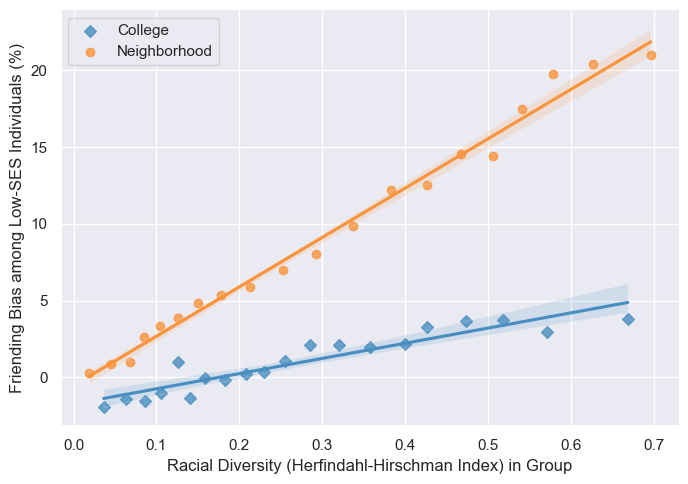

In [244]:
# Set style.
sns.set_style('darkgrid')

# Create the replication color palette.
colors = ["#488ec0", "#fa943c"]
palette_q5 = sns.set_palette(sns.color_palette(colors))

# Create the lmplot.
plot = sns.lmplot(x = "hhi", y = "bias",  hue= 'plot_type', data = question5_df,
                  palette = palette_q5, aspect = 1.42, fit_reg = True, markers=['D', 'o'])

# Rename the x-axis and y-axis
plt.xlabel('Racial Diversity (Herfindahl-Hirschman Index) in Group') 
plt.ylabel('Friending Bias among Low-SES Individuals (%)')


# Define legend location.
plt.legend(loc='upper left')

# Remove the outer legend. 
plot.legend.remove()

# Output the plot.
plt.show()

Finally, we have created a replication of the demanded figure !